## Seaborn is powerful visualization library
- Built on top of Matplotlib
- Tightly integerated with Pydata stack
- Matplotlib seeks to "make things easy and hard things possible"
- Seaborn is a complement to this
- Makes "production ready plots"

[doc](https://seaborn.pydata.org/)

In [1]:
# installing library
# !pip install seaborn

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

print(sns.__version__)
print(pd.__version__)
print(np.__version__)

0.11.1
1.2.4
1.20.1


In [3]:
wine_data = pd.read_csv("datasets/winequality-white.csv", 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid",
                               "Residual Sugar", "Chlorides",  "Free Sulfur Dioxide", "Total Sulfur Dioxide", 
                               "Density", "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   Alcohol  Quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
# last 5 records
wine_data.tail()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      Alcohol  Quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [5]:
len(wine_data)

4898

In [6]:
wine_data.describe()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide      Density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    Sulphates      Alcohol      Quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

**Heirarchy of Plotting Operations**
```
    <---+-------------------------+--->
    Low Level                  High Level
  "Color this pixel red"     "Contour this 2-D Array"
```
- Low Level operation act on specific plot elements
- High Level operation act on plot as a whole

__Heirarchy__
```
            Figure
              |
             / \
            /   \
        Canvas  Axes
                 |
                / \
               /   \
             Axis  Axis
              |
             / \
            /   \
          Minor Major
          Ticks Ticks     
                
```
- Everything is an Artist
- Artist are arranged in a heirarchy
- Artist is an abstract base class
- Figure is a container class
- Figure is top level container
- Pyplot API's operate at higher levels
- Matplotlib API's operate at lower levels


**Kernel Density Estimation**
- Given a set of points
- A bar or histogram representing counts or frequency of data
- Figure out their probability distribution
- Area under curve must sum to 1
- KDE is a standard technique to find the probability distribution
- Non-parametic "smoothing technique"
- To calculate the KDE, assume that points have same distirbution
- Points are independent Identically distributed, (each bar have probability curve)
- Sum all the curve (done using integration)
- Get resulting data

**Gaussian kernel**
- Gaussain probability distribution
- Defined by
    - mean (µ)
    - standard deviation (σ)

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
wine_data = pd.read_csv("datasets/winequality-white.csv", 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid",
                               "Residual Sugar", "Chlorides",  "Free Sulfur Dioxide", "Total Sulfur Dioxide", 
                               "Density", "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   Alcohol  Quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

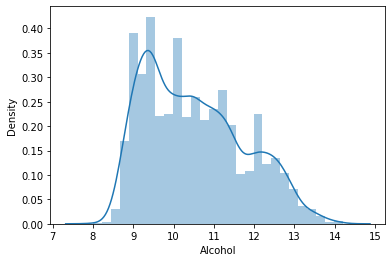

In [9]:
sns.distplot(wine_data['Alcohol'])

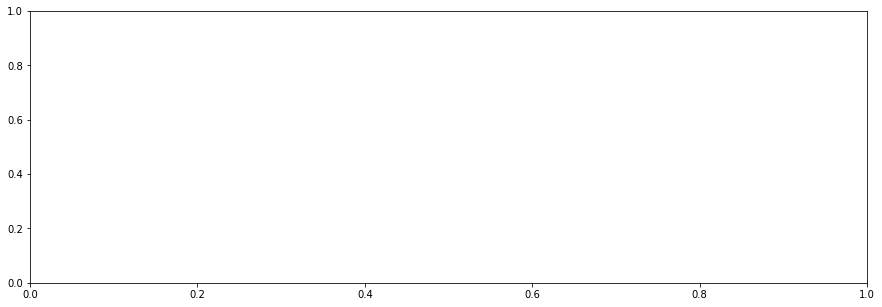

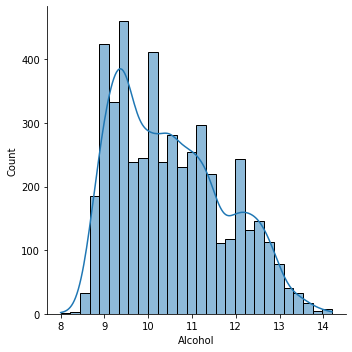

In [10]:
f, ax = plt.subplots(figsize=(15, 5))

sns.displot(wine_data["Alcohol"], kde=True)
# https://seaborn.pydata.org/generated/seaborn.displot.html

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol'>

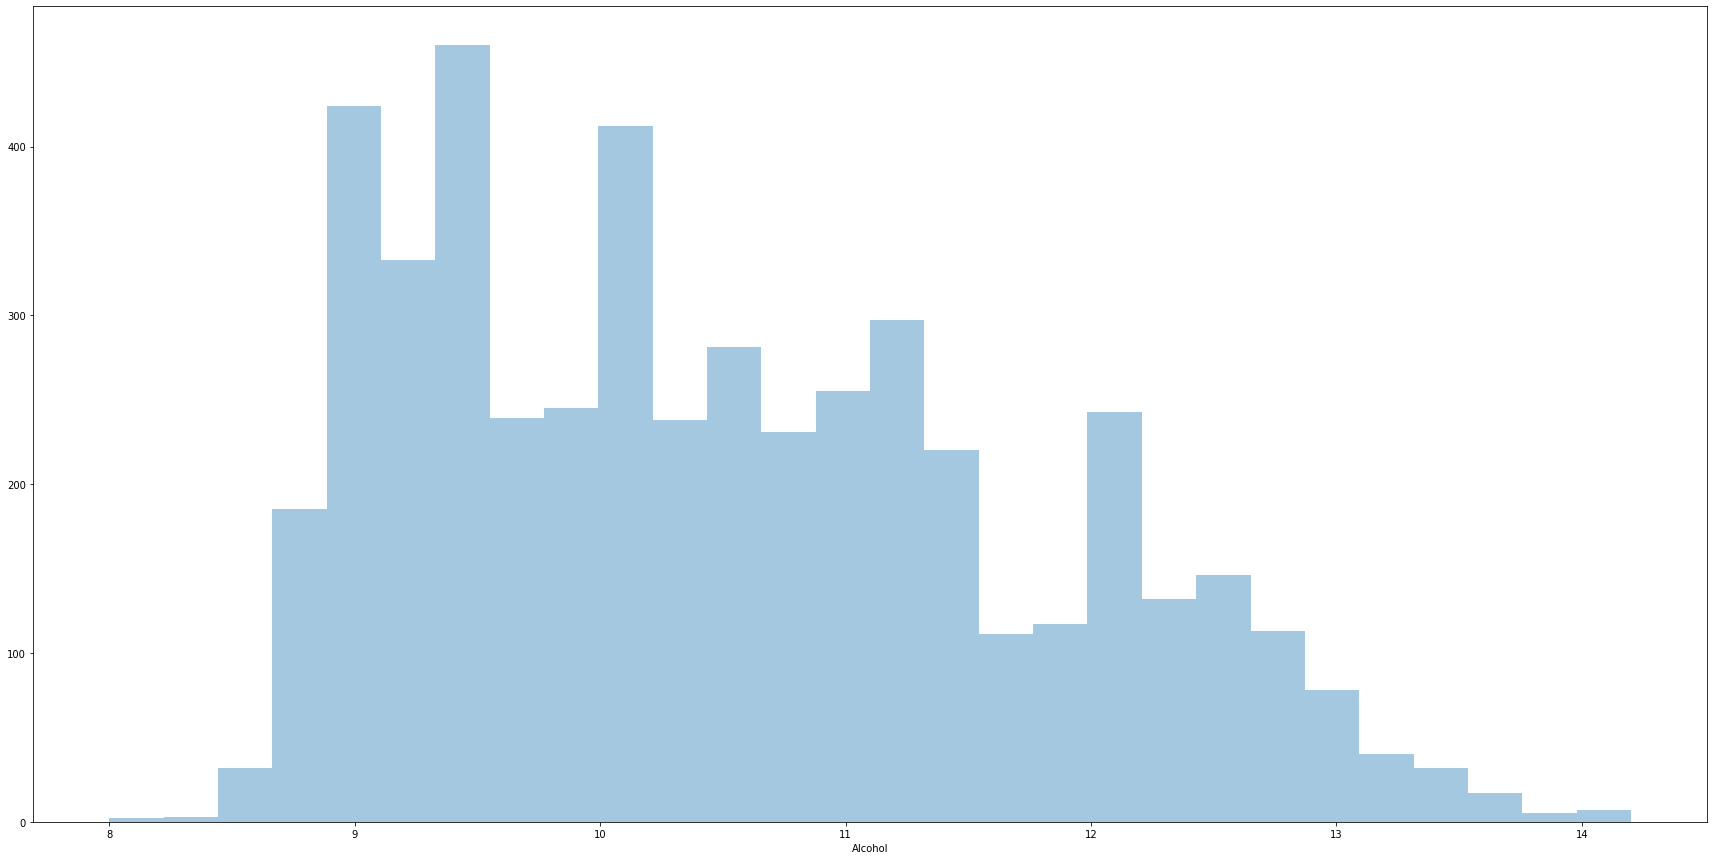

In [11]:
f, ax = plt.subplots(figsize=(30, 15))

sns.distplot(wine_data["Alcohol"], kde=False, ax=ax)

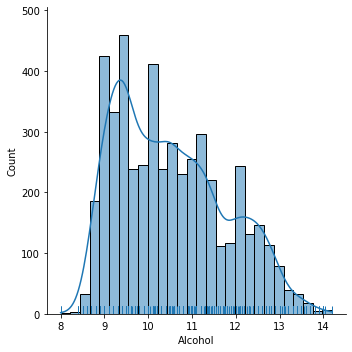

In [12]:
sns.displot(wine_data["Alcohol"], kde=True, rug=True)

<AxesSubplot:xlabel='Alcohol'>

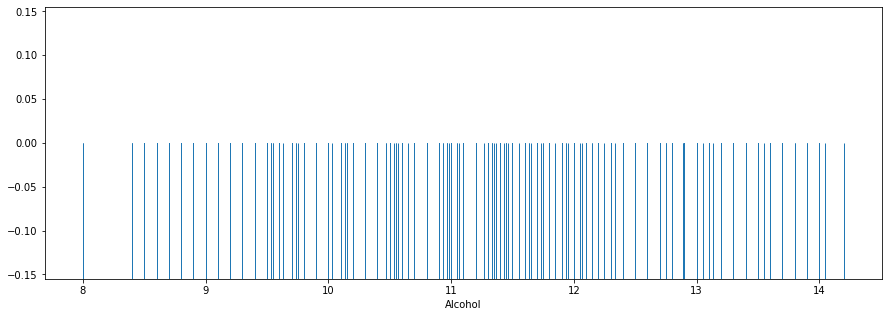

In [13]:
f, ax = plt.subplots(figsize=(15, 5))

sns.rugplot(wine_data["Alcohol"], height=0.5, x="Alcohol")

<AxesSubplot:xlabel='Alcohol'>

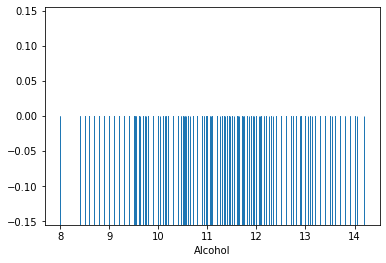

In [14]:
sns.rugplot(wine_data["Alcohol"], height=0.5, x="Alcohol")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol'>

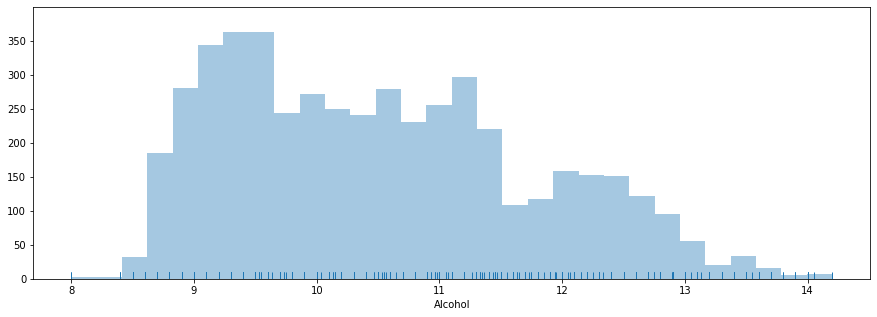

In [15]:
f, ax = plt.subplots(figsize=(15, 5))

sns.distplot(wine_data["Alcohol"], kde=False,rug=True, bins=30)

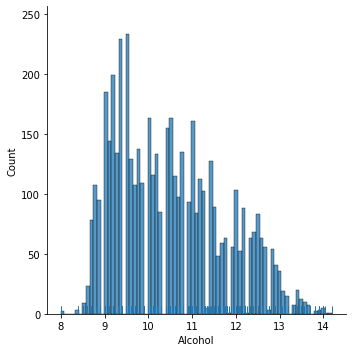

In [16]:
sns.displot(wine_data["Alcohol"], kde=False,rug=True, bins=75)

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

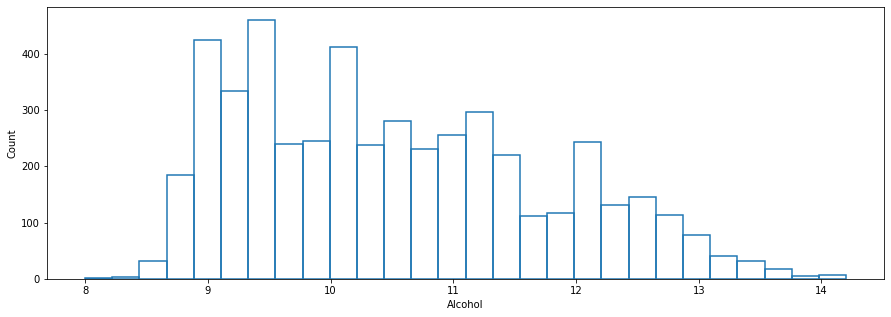

In [17]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(wine_data["Alcohol"], fill=False)

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

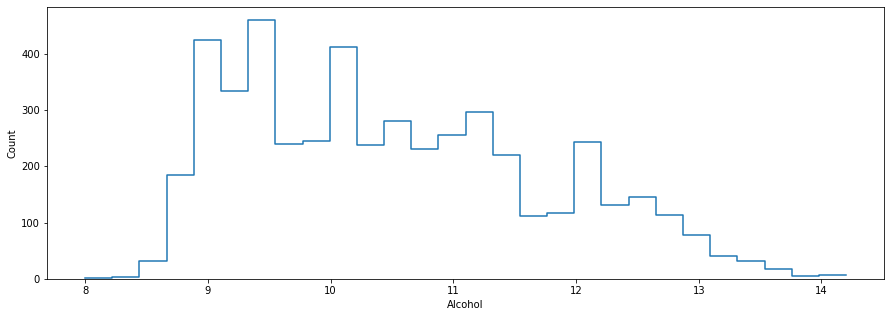

In [18]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(wine_data["Alcohol"], fill=False, element="step")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

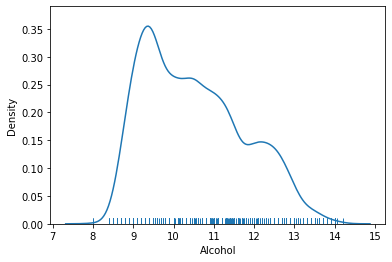

In [19]:
sns.distplot(wine_data["Alcohol"], hist=False, rug=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

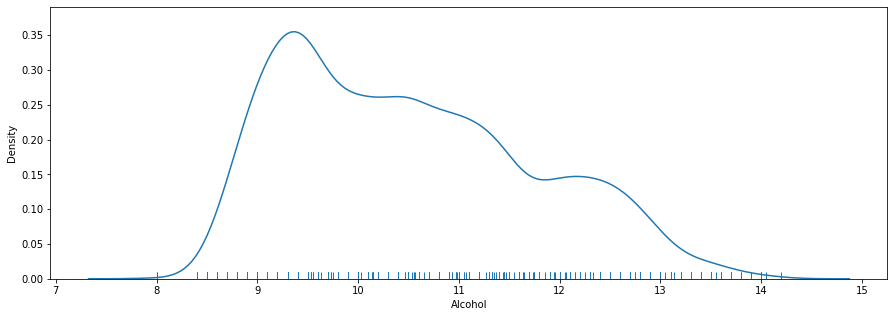

In [20]:
f, ax = plt.subplots(figsize=(15, 5))


sns.distplot(wine_data["Alcohol"], hist=False, rug=True, ax=ax)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

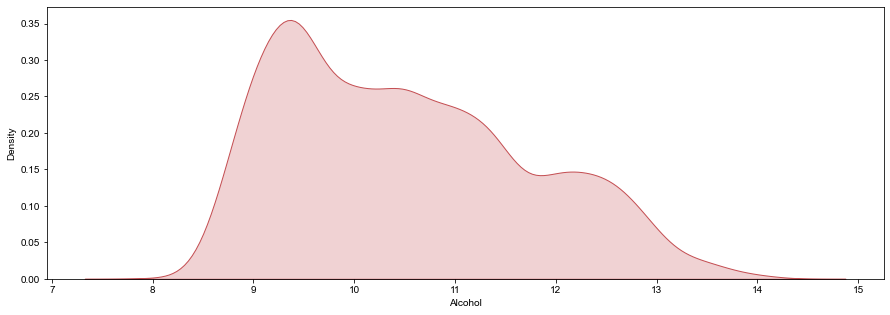

In [21]:
# kde plot

f, ax = plt.subplots(figsize=(15, 5))
sns.set(color_codes=True)
sns.kdeplot(wine_data['Alcohol'], shade=True, color="r")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.04 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

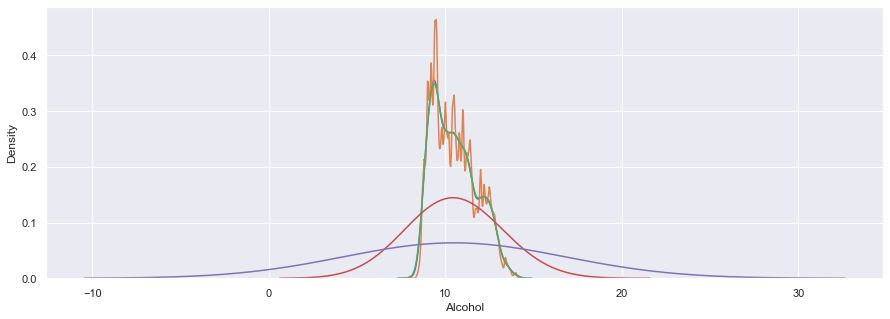

In [22]:
# mulitple kdes plot

f, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(wine_data['Alcohol'])
sns.kdeplot(wine_data['Alcohol'], bw=.04, label="bw: 0.04")
sns.kdeplot(wine_data['Alcohol'], bw=.2, label="bw: 0.2")
sns.kdeplot(wine_data['Alcohol'], bw=2, label="bw: 2")
sns.kdeplot(wine_data['Alcohol'], bw=5, label="bw: 5")

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

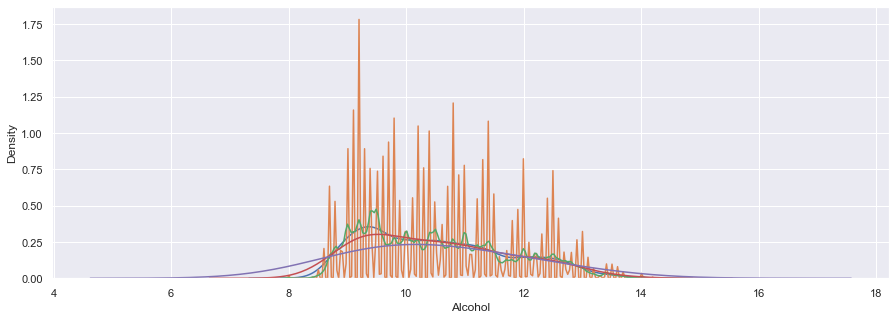

In [23]:
# mulitple kdes plot
# note: bw is deprecated 
# bw = bandwidth

f, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(wine_data['Alcohol'])
sns.kdeplot(wine_data['Alcohol'], bw_adjust=.04, label="bw_adjust: 0.04")
sns.kdeplot(wine_data['Alcohol'], bw_adjust=.2, label="bw_adjust: 0.2")
sns.kdeplot(wine_data['Alcohol'], bw_adjust=2, label="bw_adjust: 2")
sns.kdeplot(wine_data['Alcohol'], bw_adjust=5, label="bw_adjust: 5")

**Joint Plot**

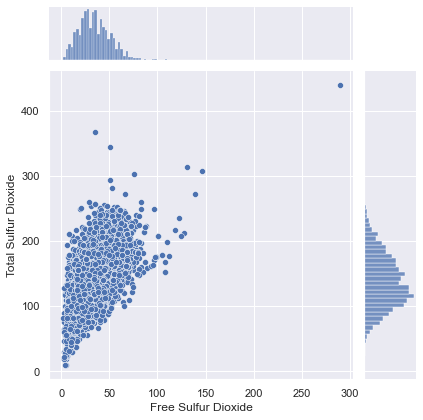

In [24]:
sns.jointplot(x="Free Sulfur Dioxide", y="Total Sulfur Dioxide", data=wine_data)
# produces scatter plot

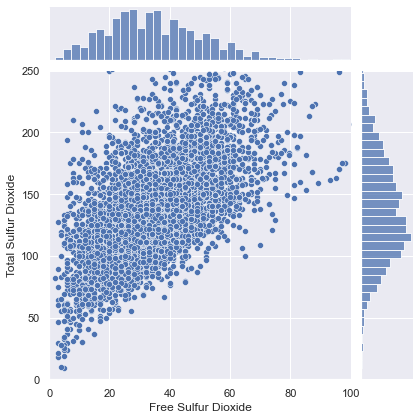

In [25]:
# specifying limit for unvariate results

sns.jointplot(x="Free Sulfur Dioxide", 
              y="Total Sulfur Dioxide", 
              data=wine_data, 
              xlim=(0, 100),
              ylim=(0, 250))

# helps in zooming of figure

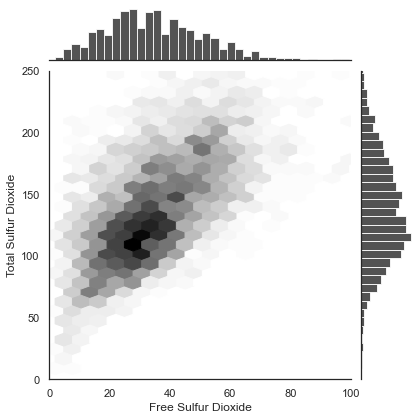

In [26]:
# setting axis theme

with sns.axes_style('white'):
    sns.jointplot(x="Free Sulfur Dioxide", 
              y="Total Sulfur Dioxide", 
              data=wine_data, 
              xlim=(0, 100),
              ylim=(0, 250),
              kind="hex",
              color="k")

# hexbin plot: histogram with bivariate data

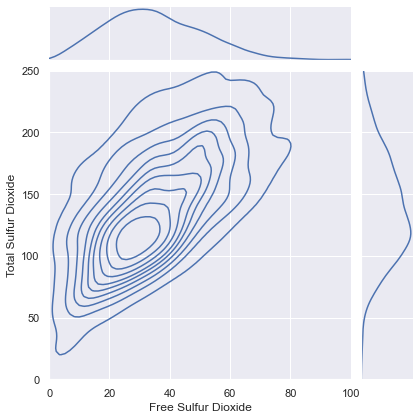

In [27]:
# kde plot using jointplot
sns.jointplot(x="Free Sulfur Dioxide", 
              y="Total Sulfur Dioxide", 
              data=wine_data, 
              xlim=(0, 100),
              ylim=(0, 250),
             kind="kde")


<AxesSubplot:xlabel='Free Sulfur Dioxide', ylabel='Total Sulfur Dioxide'>

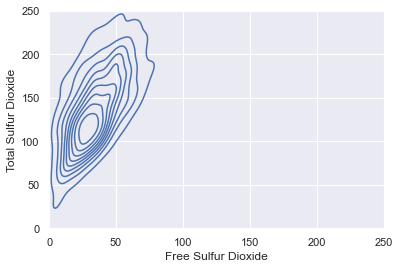

In [28]:
# kde plot

sns.kdeplot(x=wine_data["Free Sulfur Dioxide"], 
            y=wine_data["Total Sulfur Dioxide"],
           clip=(0, 250))


(0.0, 250.0)

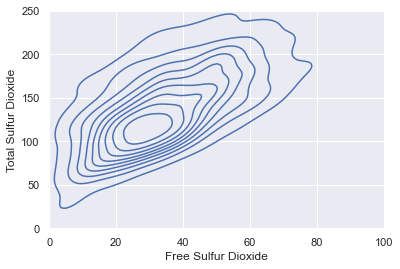

In [29]:
# kde plot using x and y limit

sns.kdeplot(x=wine_data["Free Sulfur Dioxide"], 
            y=wine_data["Total Sulfur Dioxide"],
           clip=(0, 250))
plt.xlim(0, 100)
plt.ylim(0, 250)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


(-50.0, 400.0)

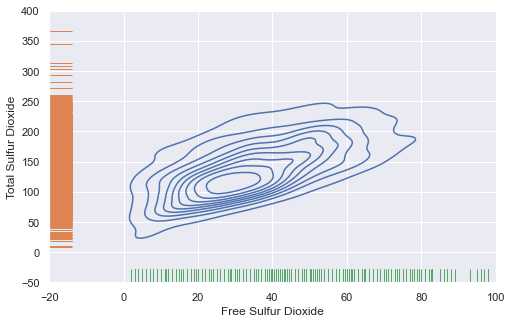

In [30]:
# plotting multilple distribution on same figure

f, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(x=wine_data["Free Sulfur Dioxide"], 
            y=wine_data["Total Sulfur Dioxide"],
           clip=(0, 250))

sns.rugplot(wine_data["Free Sulfur Dioxide"], 
            color='g', 
            height=0.05)

sns.rugplot(wine_data["Total Sulfur Dioxide"], 
            vertical=True, 
            height=0.05)

plt.xlim(-20, 100)
plt.ylim(-50, 400)

(-50.0, 400.0)

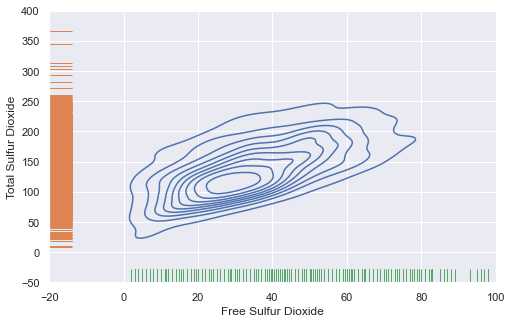

In [31]:
# avoiding warning with new version

f, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(x=wine_data["Free Sulfur Dioxide"], 
            y=wine_data["Total Sulfur Dioxide"],
           clip=(0, 250))

sns.rugplot(wine_data["Free Sulfur Dioxide"], 
            color='g', 
            height=0.05)

sns.rugplot(y = wine_data["Total Sulfur Dioxide"],  
            height=0.05)

plt.xlim(-20, 100)
plt.ylim(-50, 400)

**Pair Plot**
- To plot the bivariate relationships between every pair of columns in a dataset
- Shows relationship between every pair of possible columns

> For more info refer to [doc](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


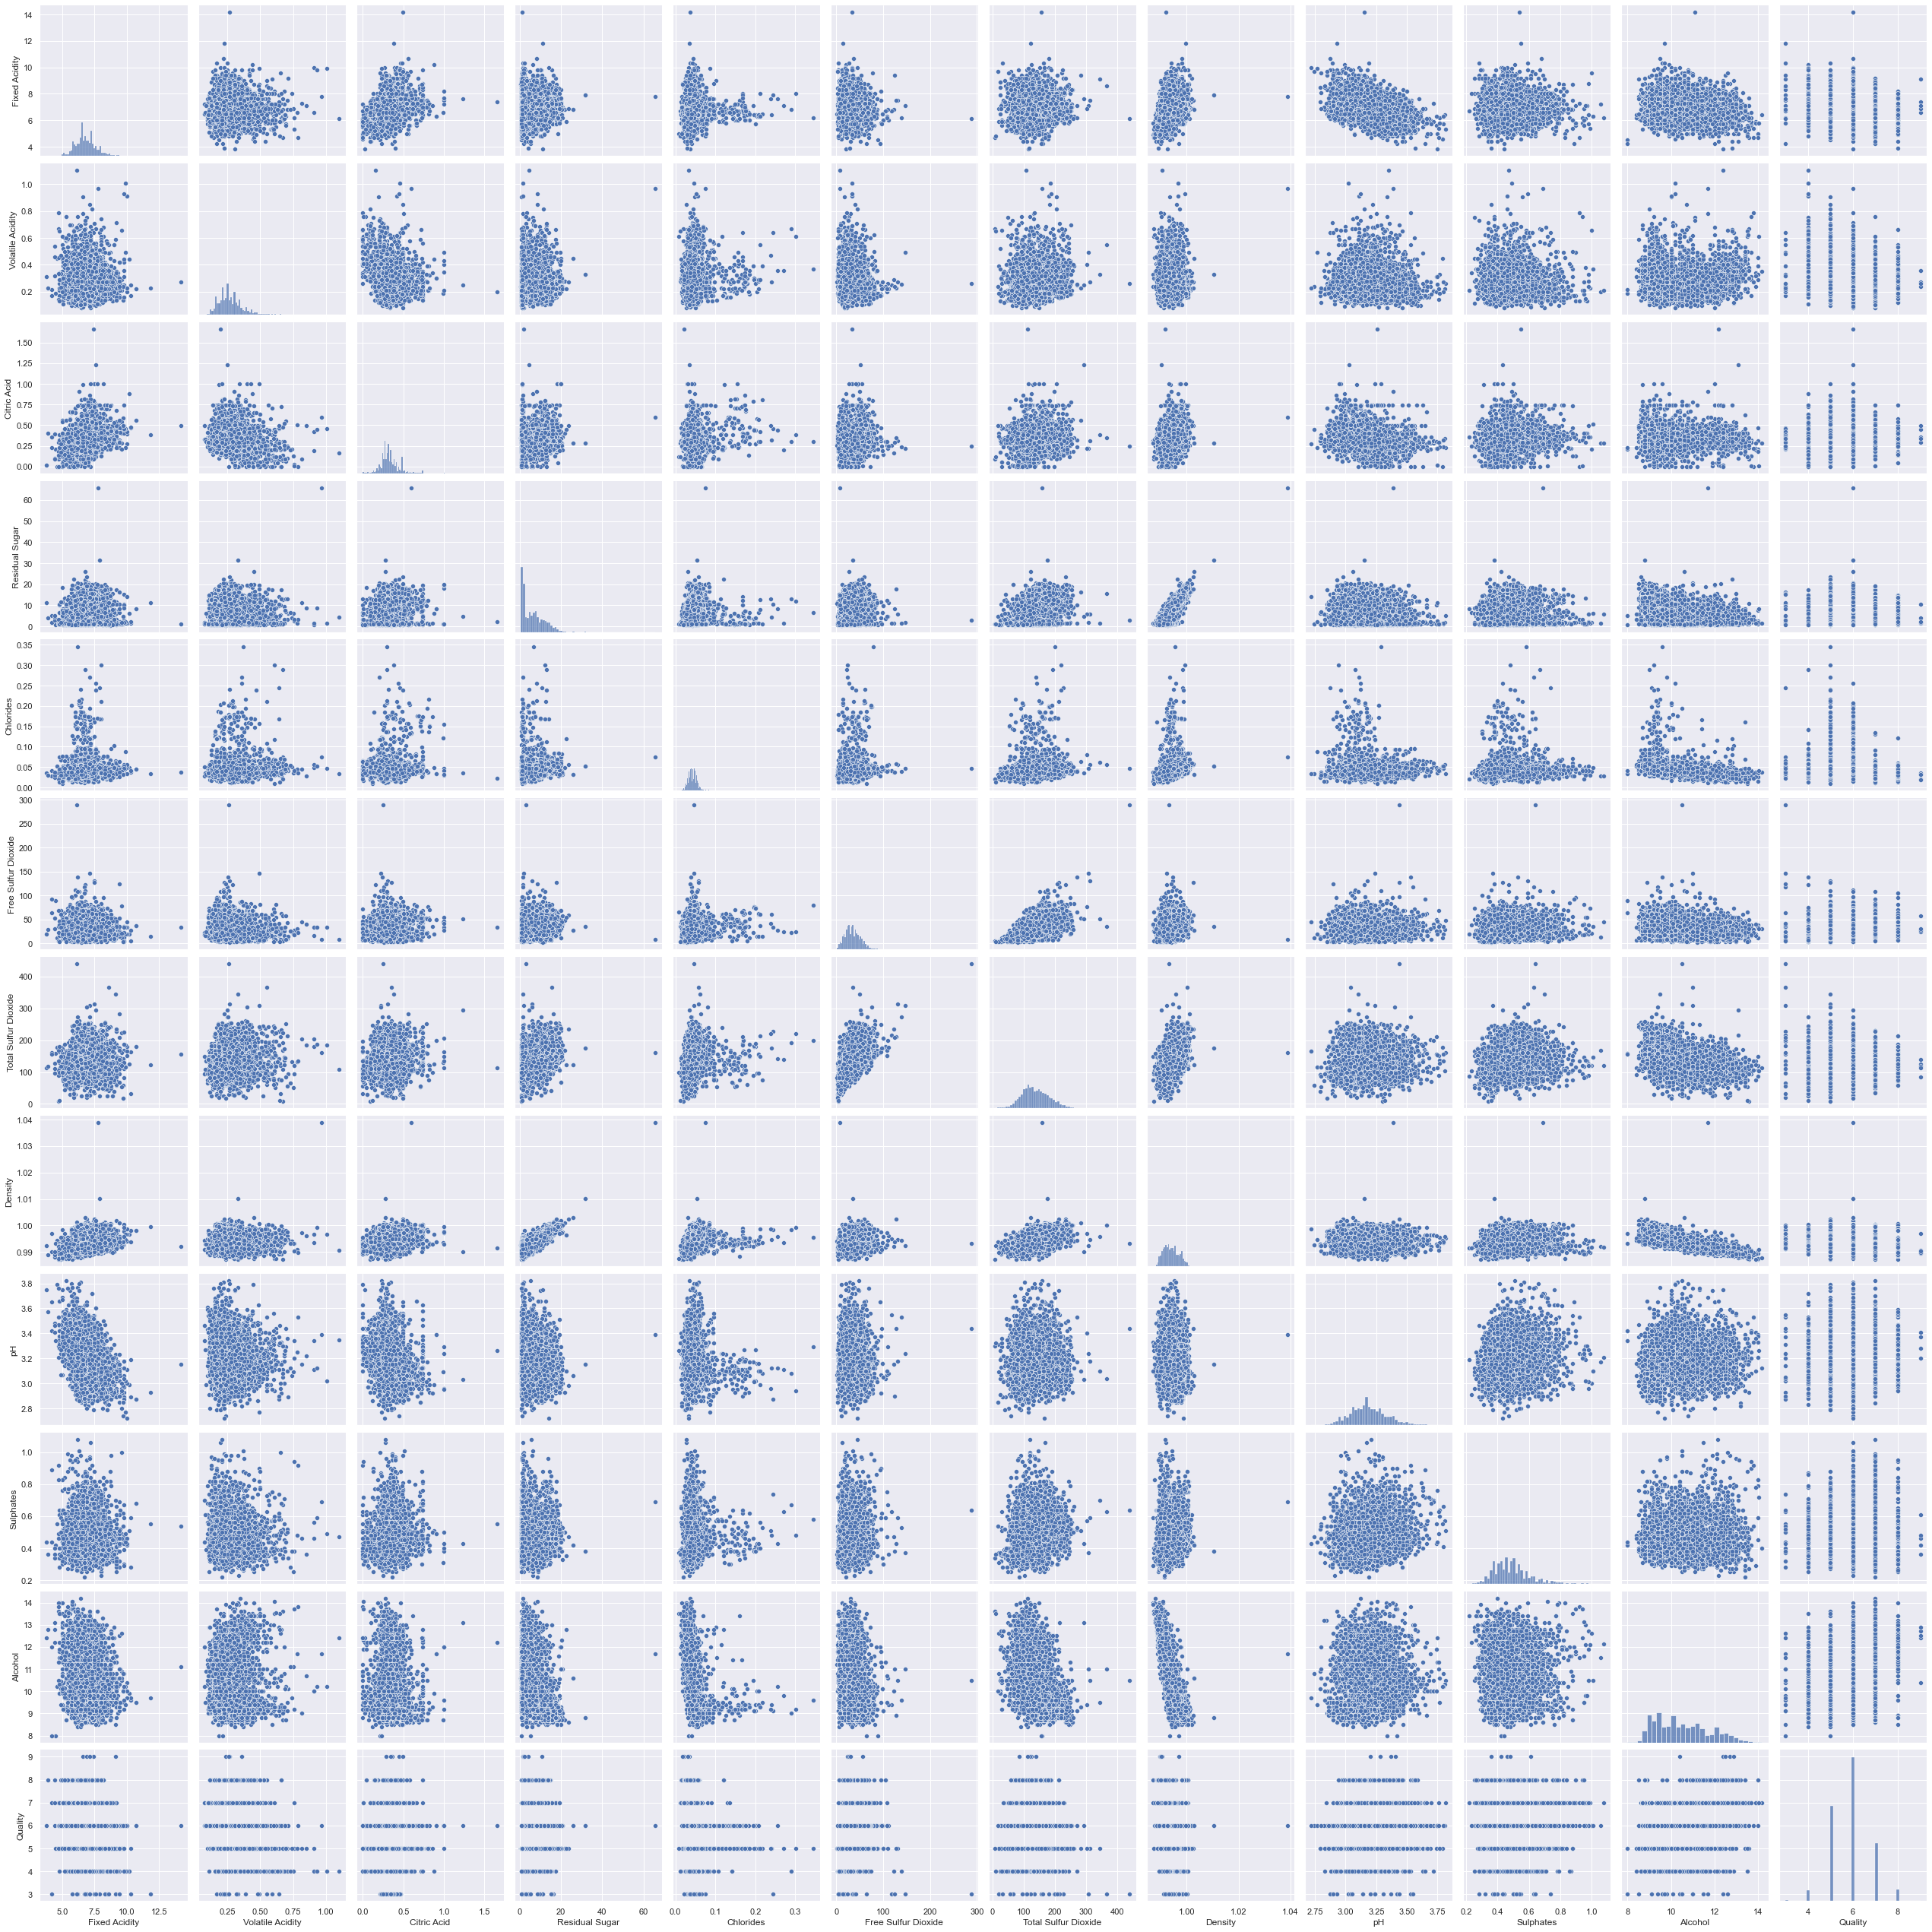

In [32]:
sns.pairplot(wine_data, size=3)

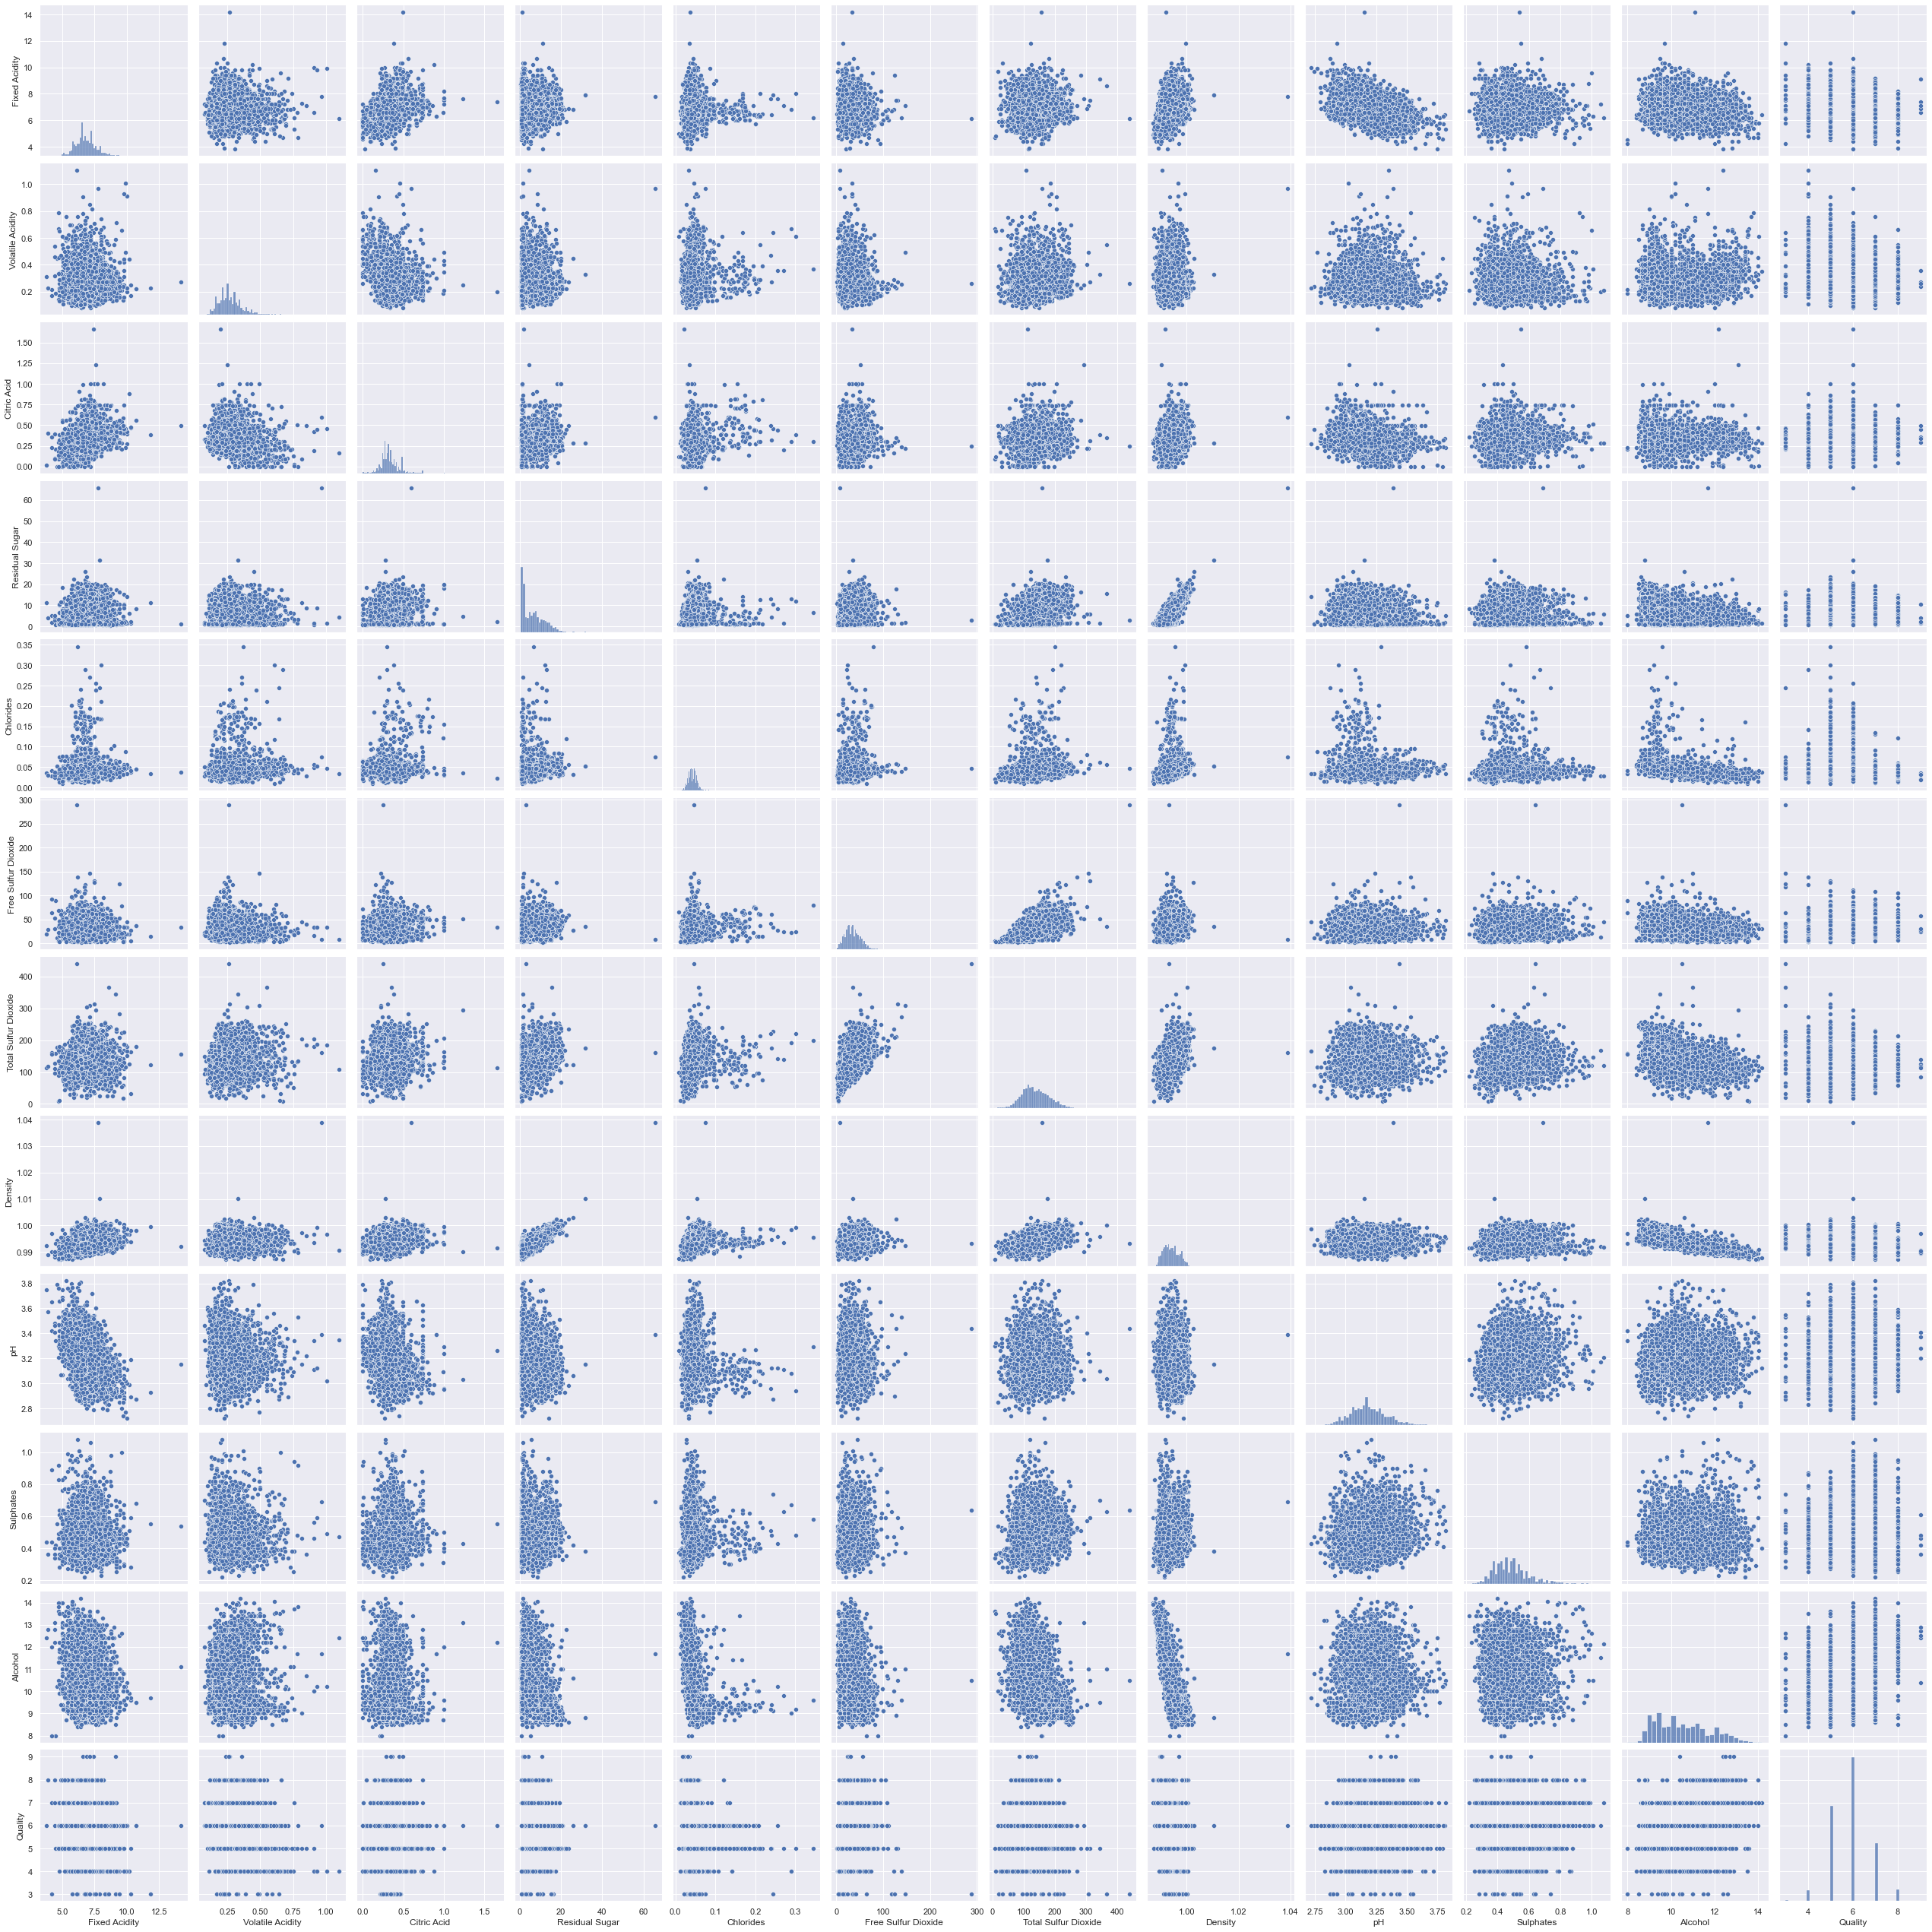

In [33]:
# avoiding warning with new version
sns.pairplot(wine_data, height=3)

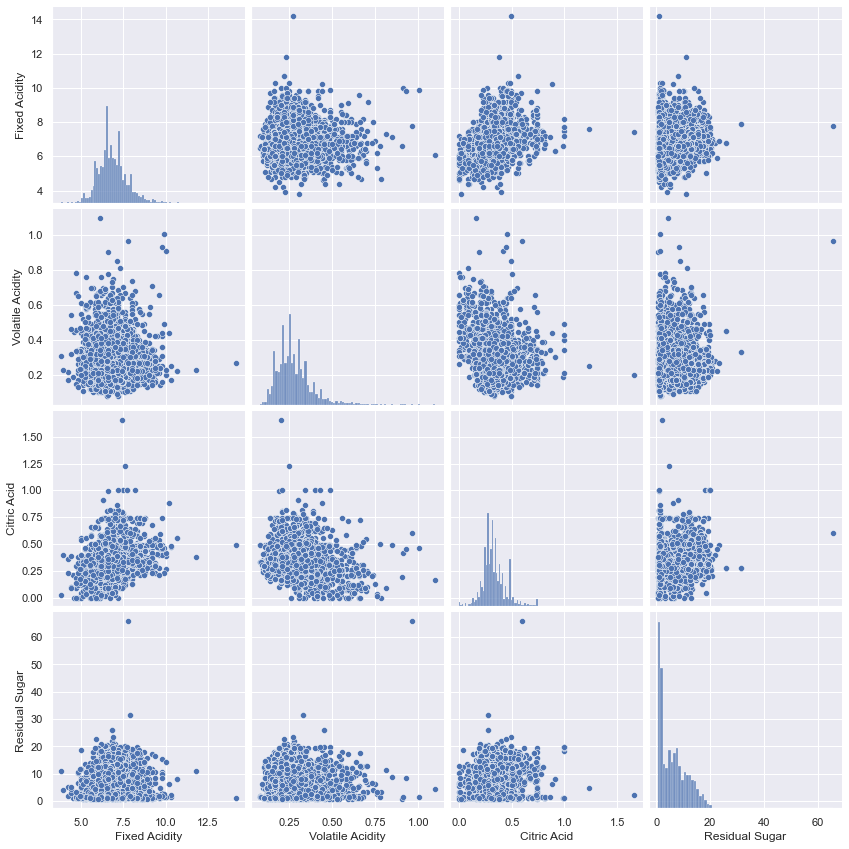

In [34]:
# Getting more managable pairplot with specific columns

sns.pairplot(wine_data, 
             height=3,
             vars=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar"])

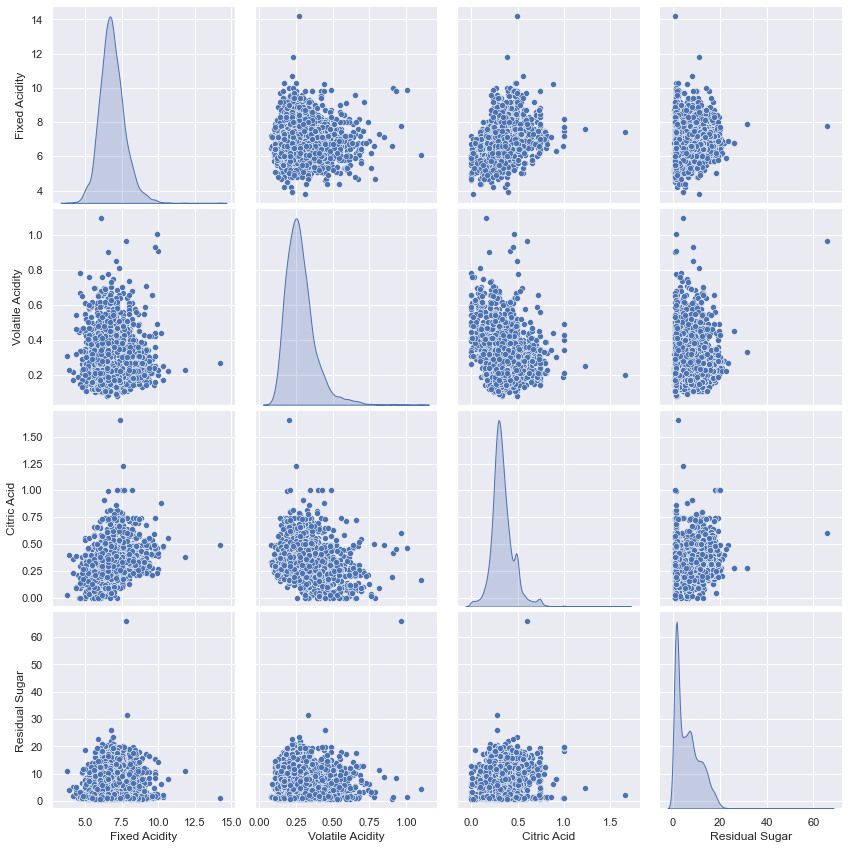

In [35]:
# Getting more managable pairplot with specific columns

sns.pairplot(wine_data, 
             height=3,
             vars=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar"],
             diag_kind="kde")
# to get diagonal plot in kde

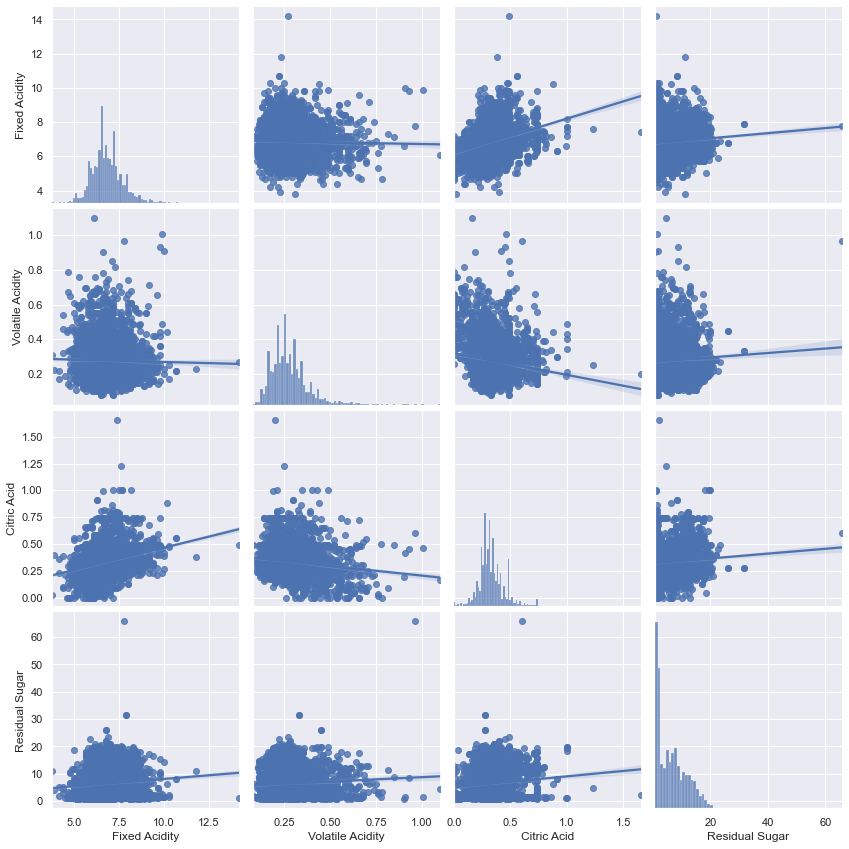

In [36]:
# regression line in pairplot

sns.pairplot(wine_data, 
             height=3,
             vars=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar"],
             kind="reg")


In [37]:
# hue representation

# sns.pairplot(wine_data, 
#              vars=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar"],
#              hue="pH")

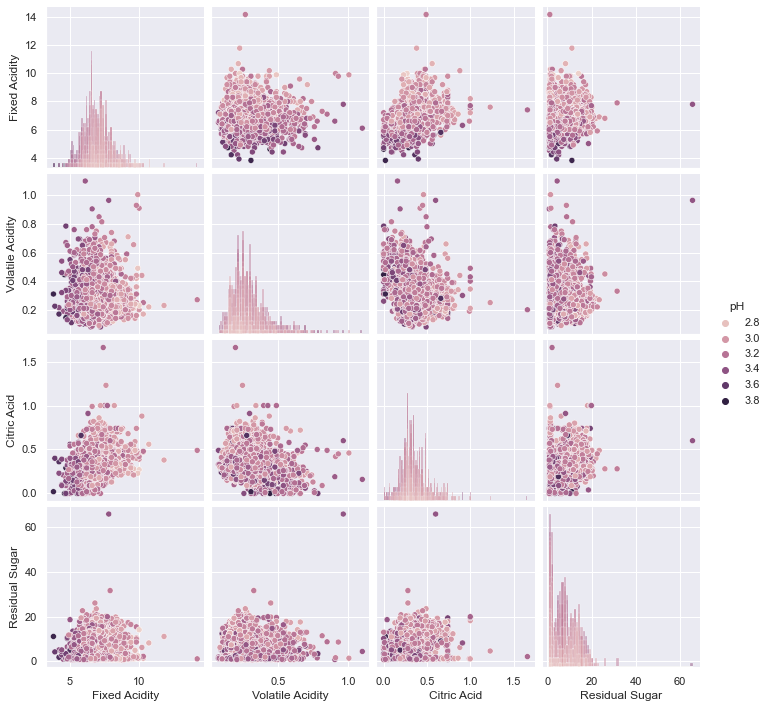

In [38]:
sns.pairplot(wine_data, 
             vars=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar"],
             hue="pH",
             diag_kind="hist")

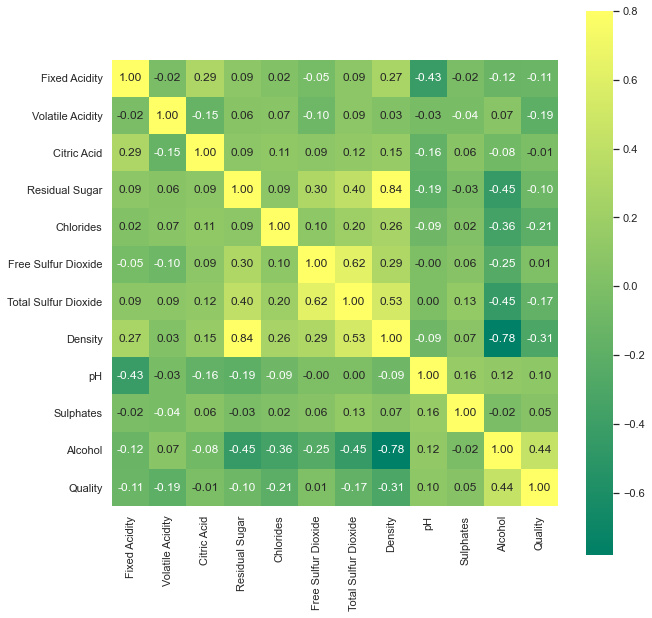

In [39]:
# correlation matrix heat map

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, 
            vmax=0.8, 
            square=True, 
            annot=True,
            fmt='.2f',
            cmap="summer")
plt.show()

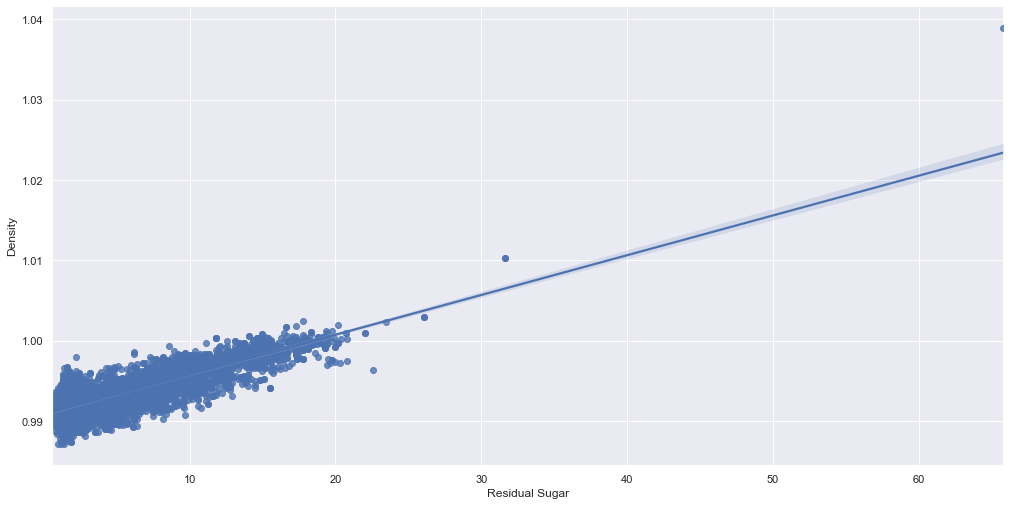

In [40]:
# Regression Plots with linear relationship

sns.lmplot(x='Residual Sugar',
          y='Density',
          data = wine_data,
          height=7,
          aspect=2)
# points closer to regression line represent high confidence


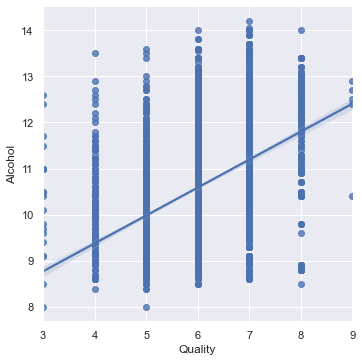

In [41]:
# using categorical data (discrete values (non-continous data))

sns.lmplot(x='Quality', 
           y='Alcohol', 
           data=wine_data)

# hard to identify value for quality

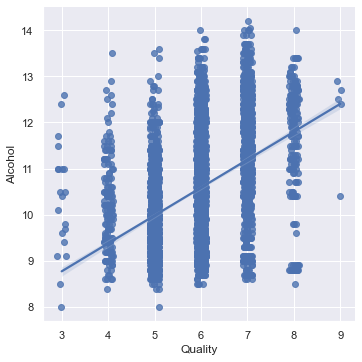

In [42]:
sns.lmplot(x='Quality', 
           y='Alcohol', 
           data=wine_data,
          x_jitter=0.1)

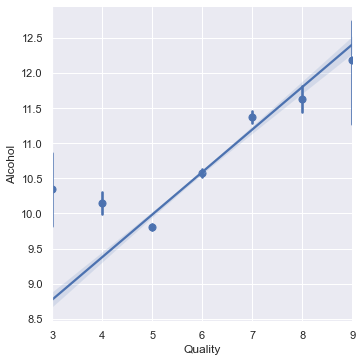

In [43]:
sns.lmplot(x='Quality', 
           y='Alcohol', 
           data=wine_data,
           x_estimator=np.mean)
# estimating the mean alcohol content at every quality score

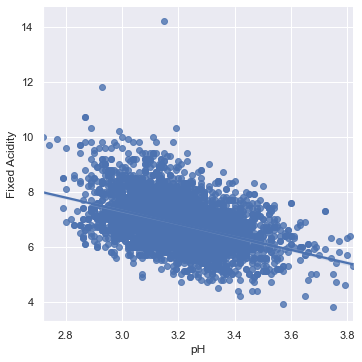

In [44]:
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data)

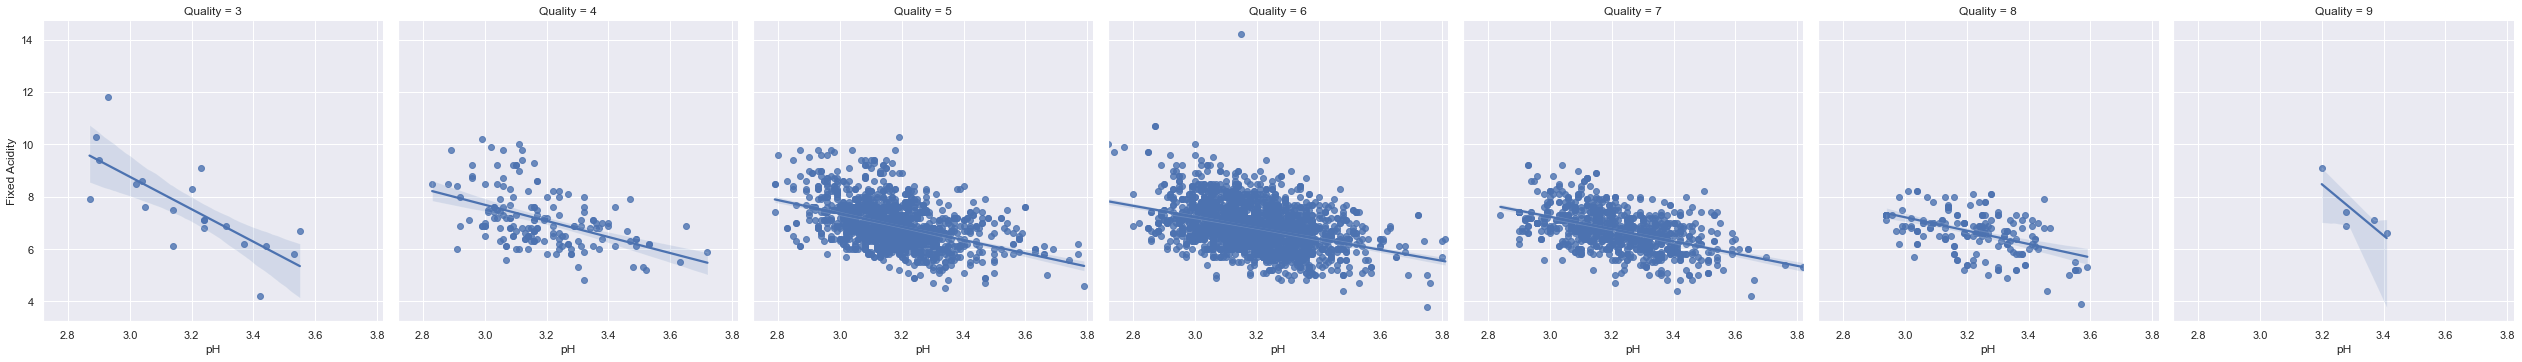

In [45]:
# for each quality score 

sns.lmplot(x='pH',
           y='Fixed Acidity',
           data=wine_data,
           col="Quality")

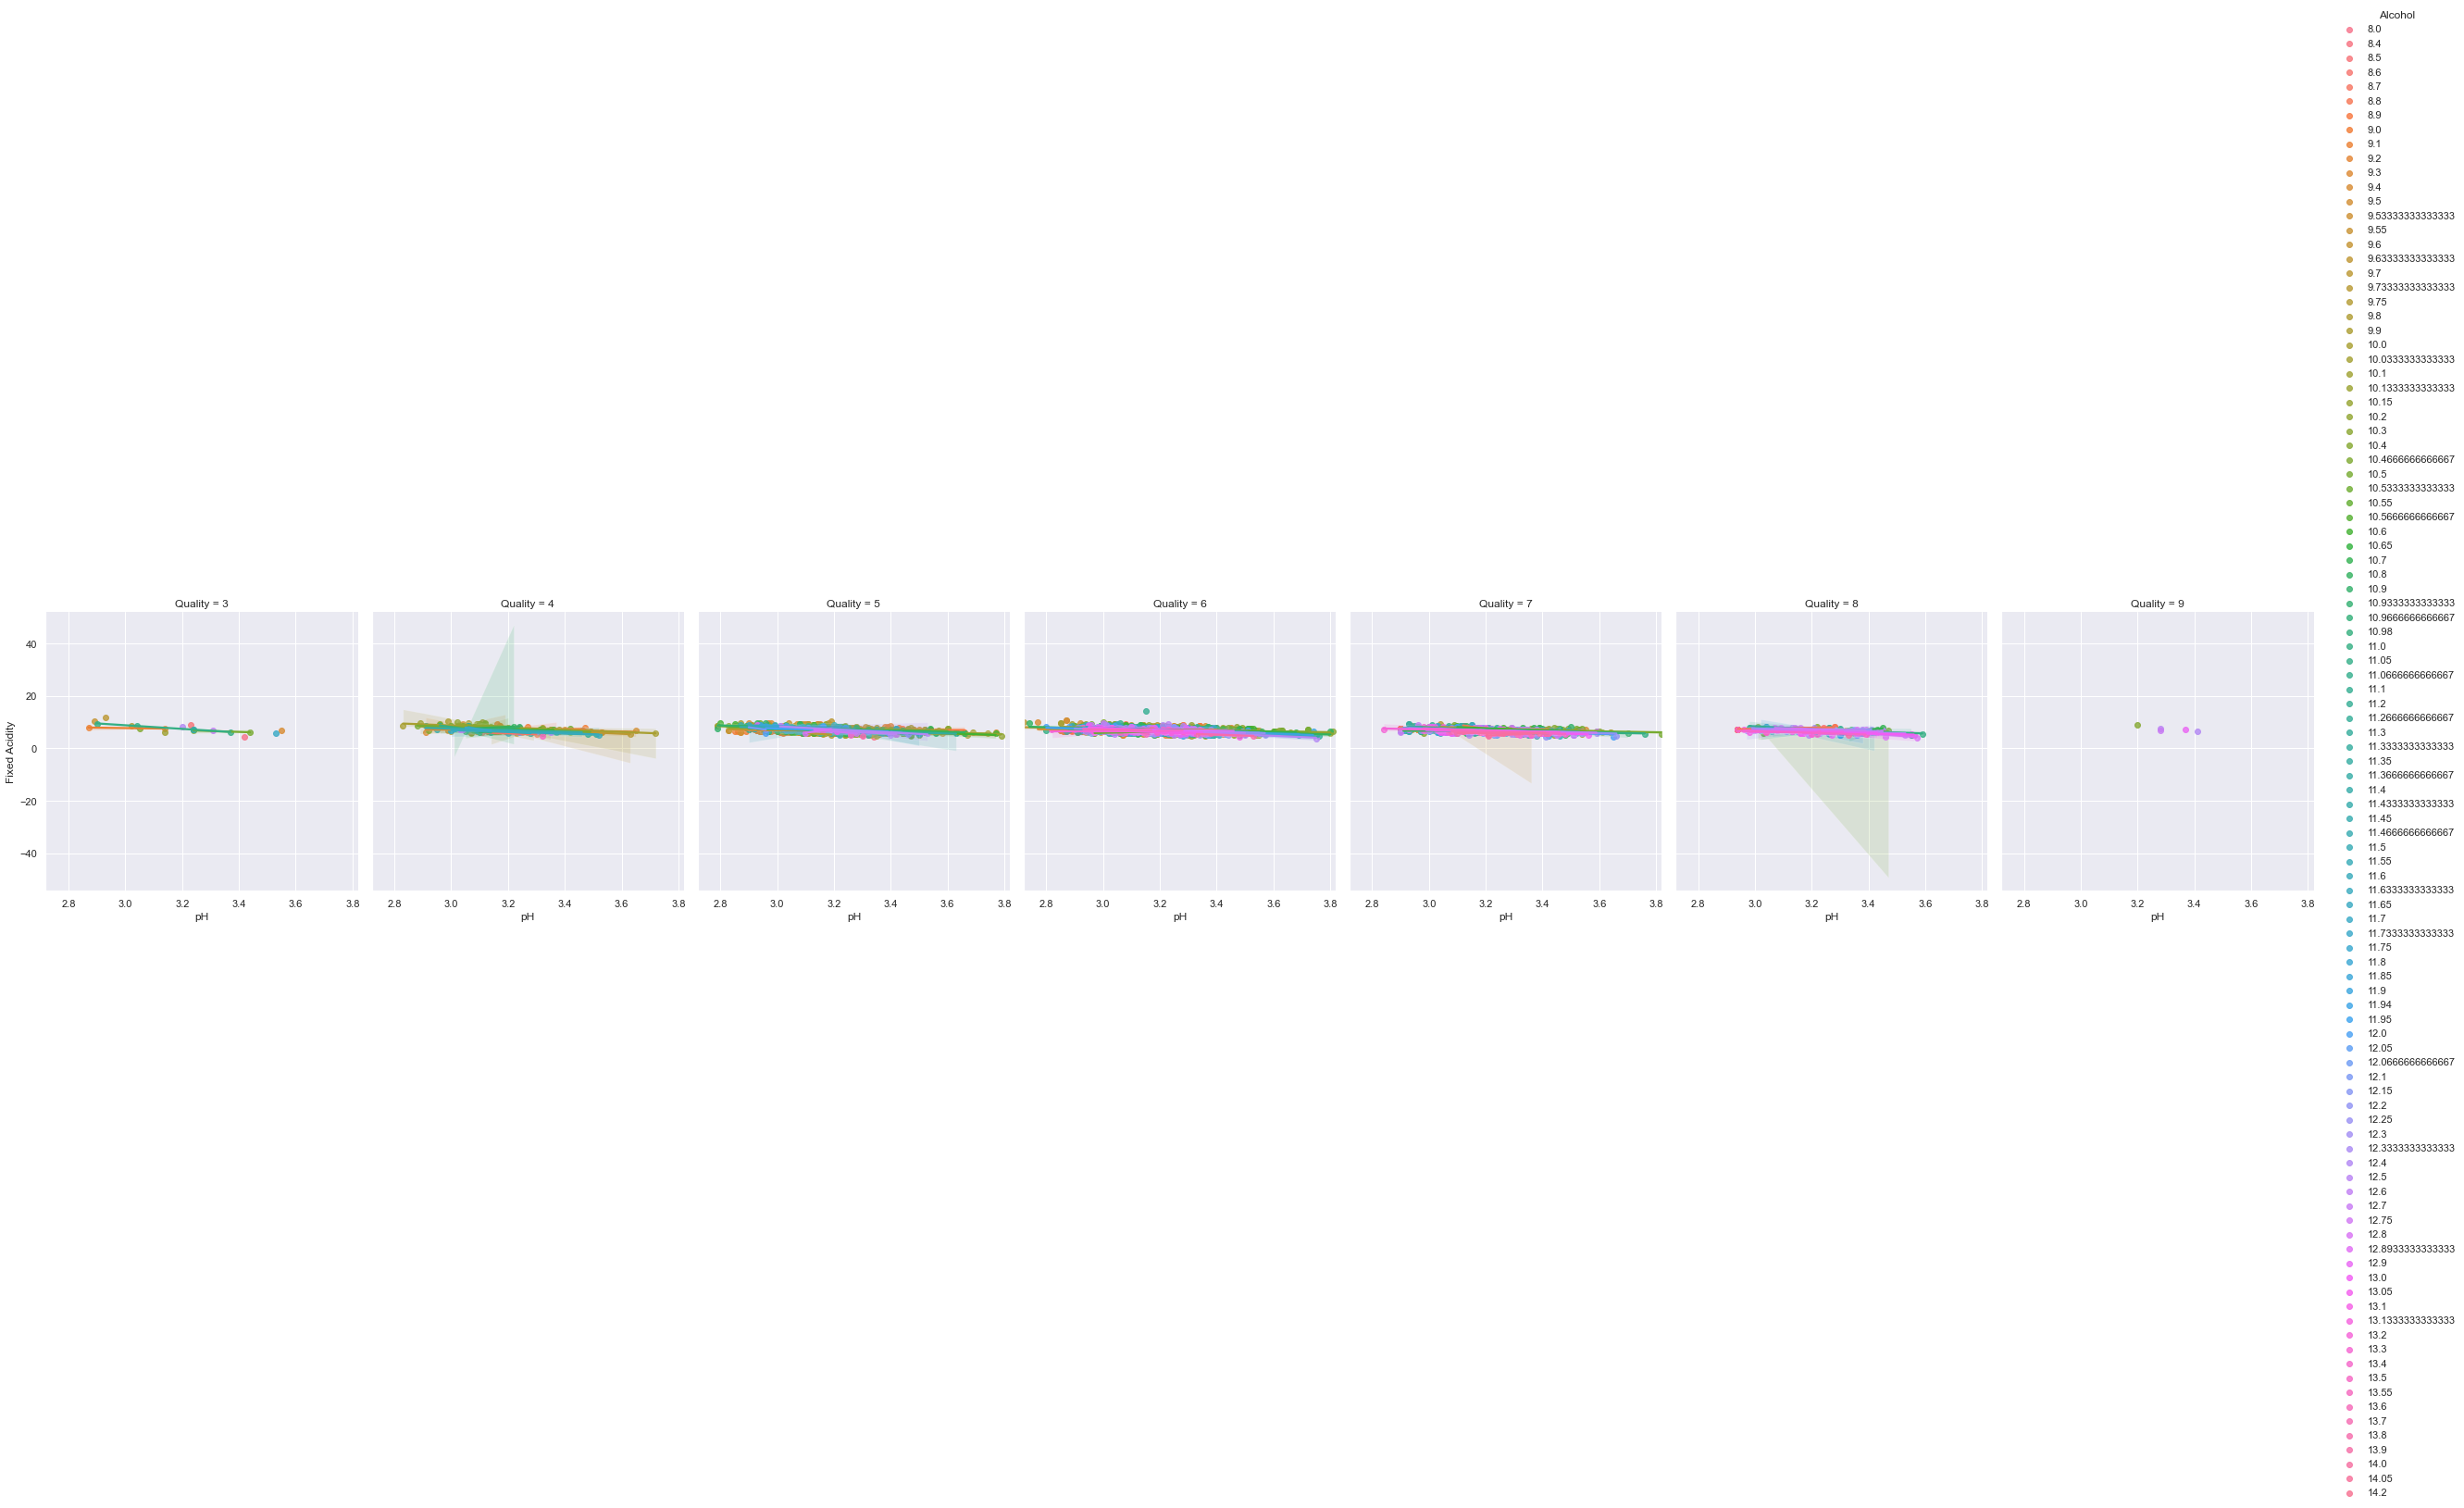

In [46]:
sns.lmplot(x='pH',
           y='Fixed Acidity',
           data=wine_data,
           col="Quality",
           hue="Alcohol")

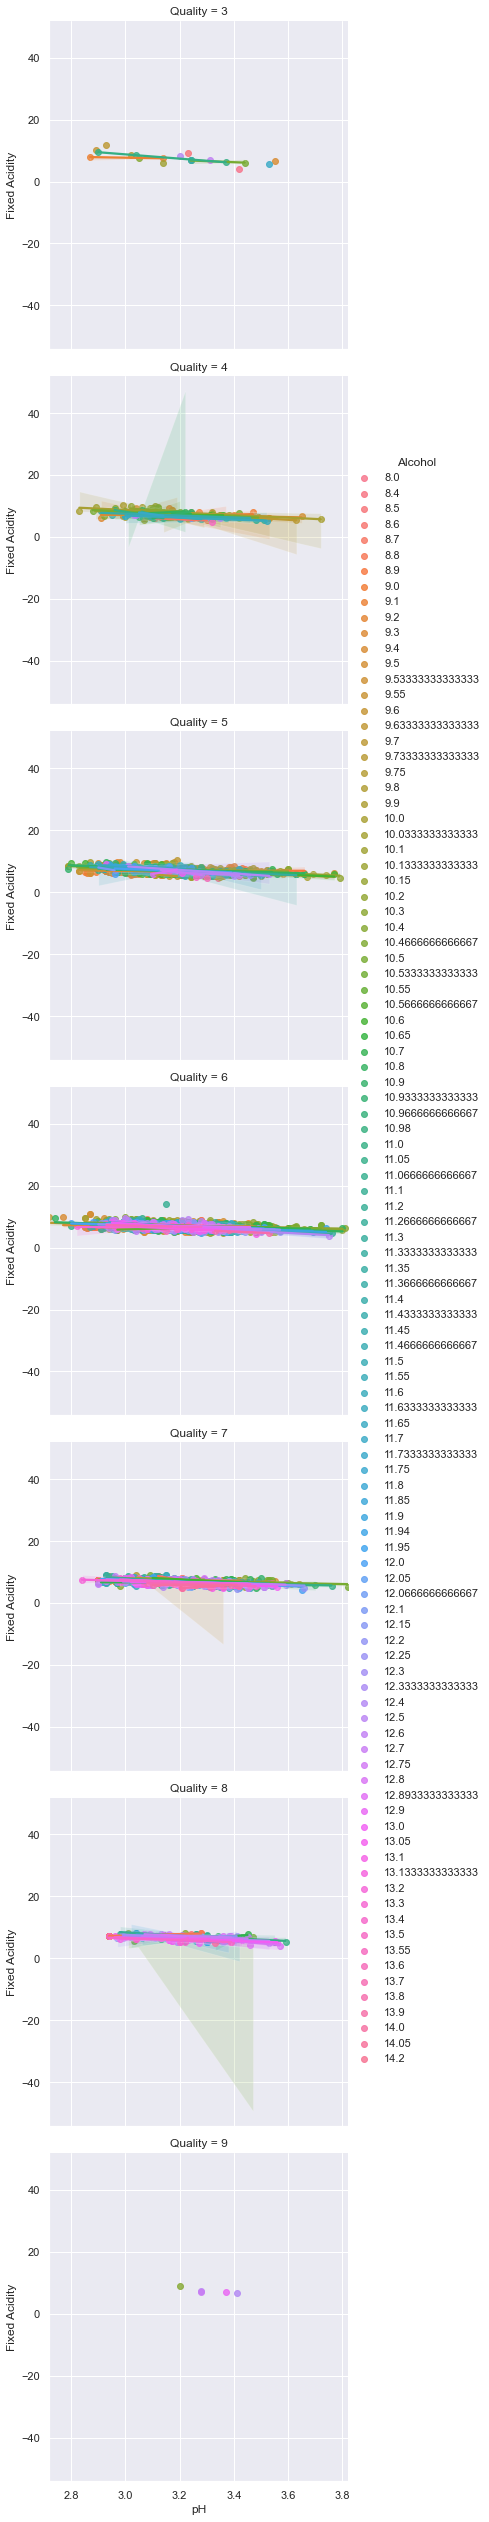

In [47]:
# row wise 

sns.lmplot(x='pH',
           y='Fixed Acidity',
           data=wine_data,
           row="Quality",
           hue="Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

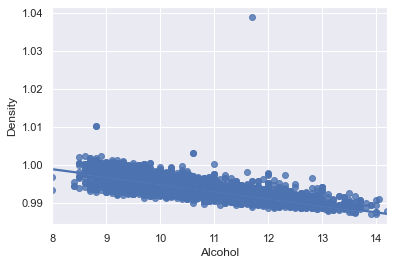

In [48]:
# Reg plot - another function for plotting regression plot

sns.regplot(x='Alcohol',
           y='Density',
           data=wine_data)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

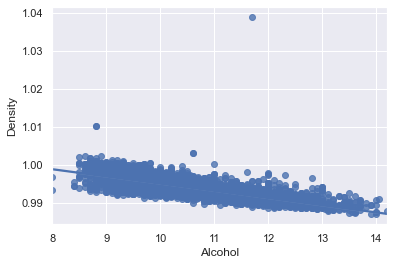

In [49]:
# also takes x, y as pandas series

sns.regplot(x=wine_data['Alcohol'],
           y=wine_data['Density'],
           data=wine_data)

<AxesSubplot:xlabel='Residual Sugar', ylabel='Density'>

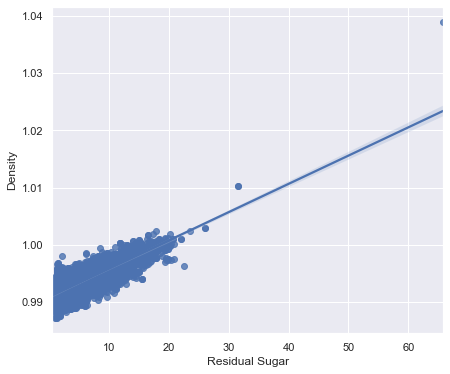

In [50]:
# controlling the size of figure

f, ax = plt.subplots(figsize=(7, 6))
sns.regplot(x='Residual Sugar',
           y='Density',
           data=wine_data,
           ax=ax)

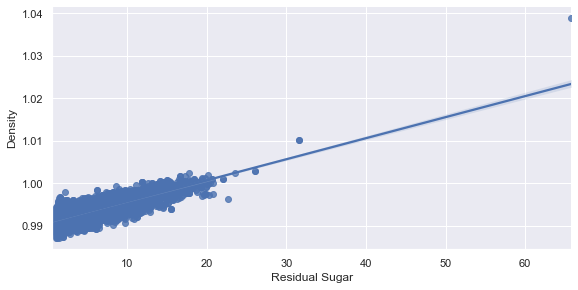

In [51]:
# another way of controlling size
sns.lmplot(x='Residual Sugar',
           y='Density',
           data=wine_data,
           height=4, 
           aspect=2)

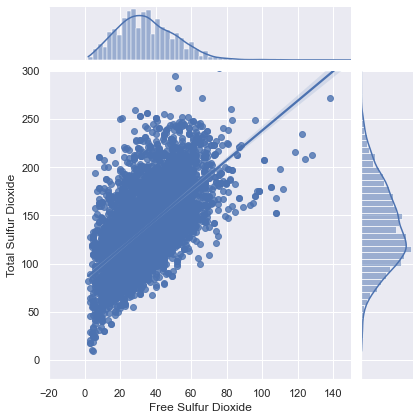

In [52]:
# joint plot wih regression line

sns.jointplot(x='Free Sulfur Dioxide',
             y="Total Sulfur Dioxide", 
             data=wine_data,
             xlim=(-20, 150),
             ylim=(-20, 300),
             kind="reg")


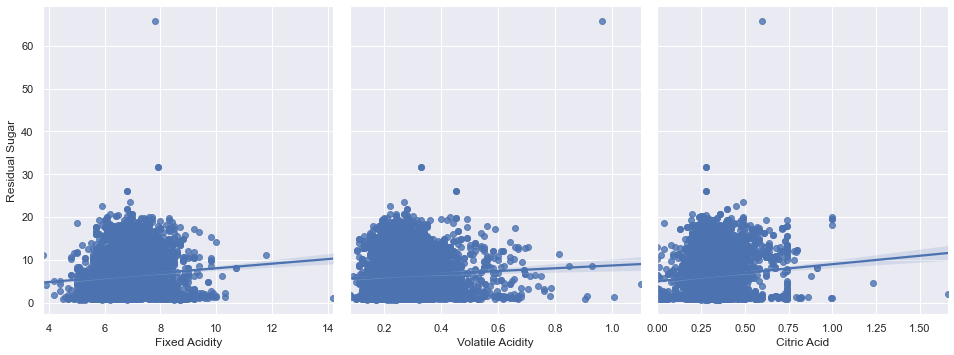

In [53]:
# pairplot with regression line

sns.pairplot(wine_data,
            height=5, 
            aspect=0.9,
            x_vars=["Fixed Acidity", "Volatile Acidity","Citric Acid"],
            y_vars=["Residual Sugar"],
            kind="reg")


**Strip Plots and Swarm Plots for Categorical Data**

In [54]:
sns.set(style="whitegrid",
       color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

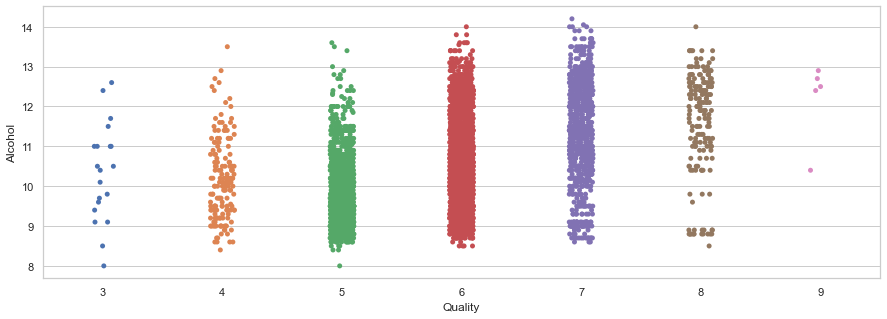

In [55]:
f, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(x="Quality",
             y="Alcohol",
             data=wine_data)

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

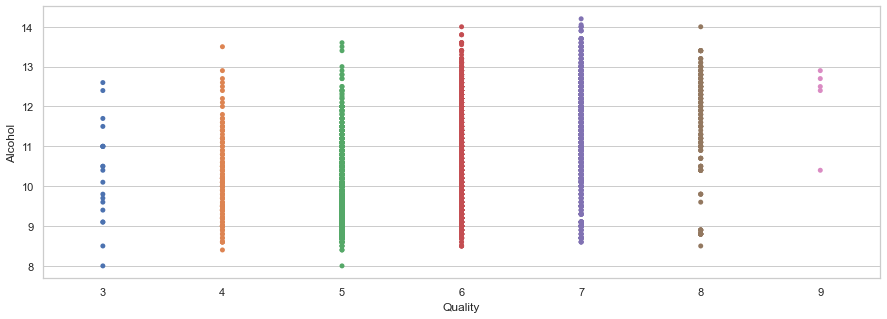

In [56]:
f, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(x="Quality",
             y="Alcohol",
             data=wine_data,
             jitter=False
             )

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

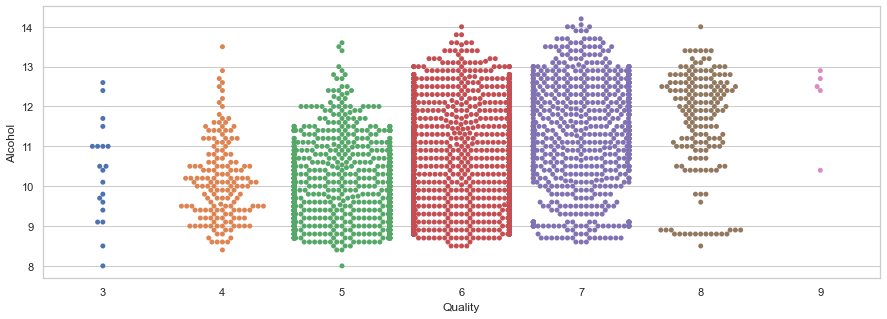

In [57]:
# Better way to viewing categorical data is using swarm plot

f, ax = plt.subplots(figsize=(15, 5))
sns.swarmplot(x="Quality",
             y="Alcohol",
             data=wine_data)
# this plot spreads out the points at every categorical value 
# so that the overlap is minimum


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

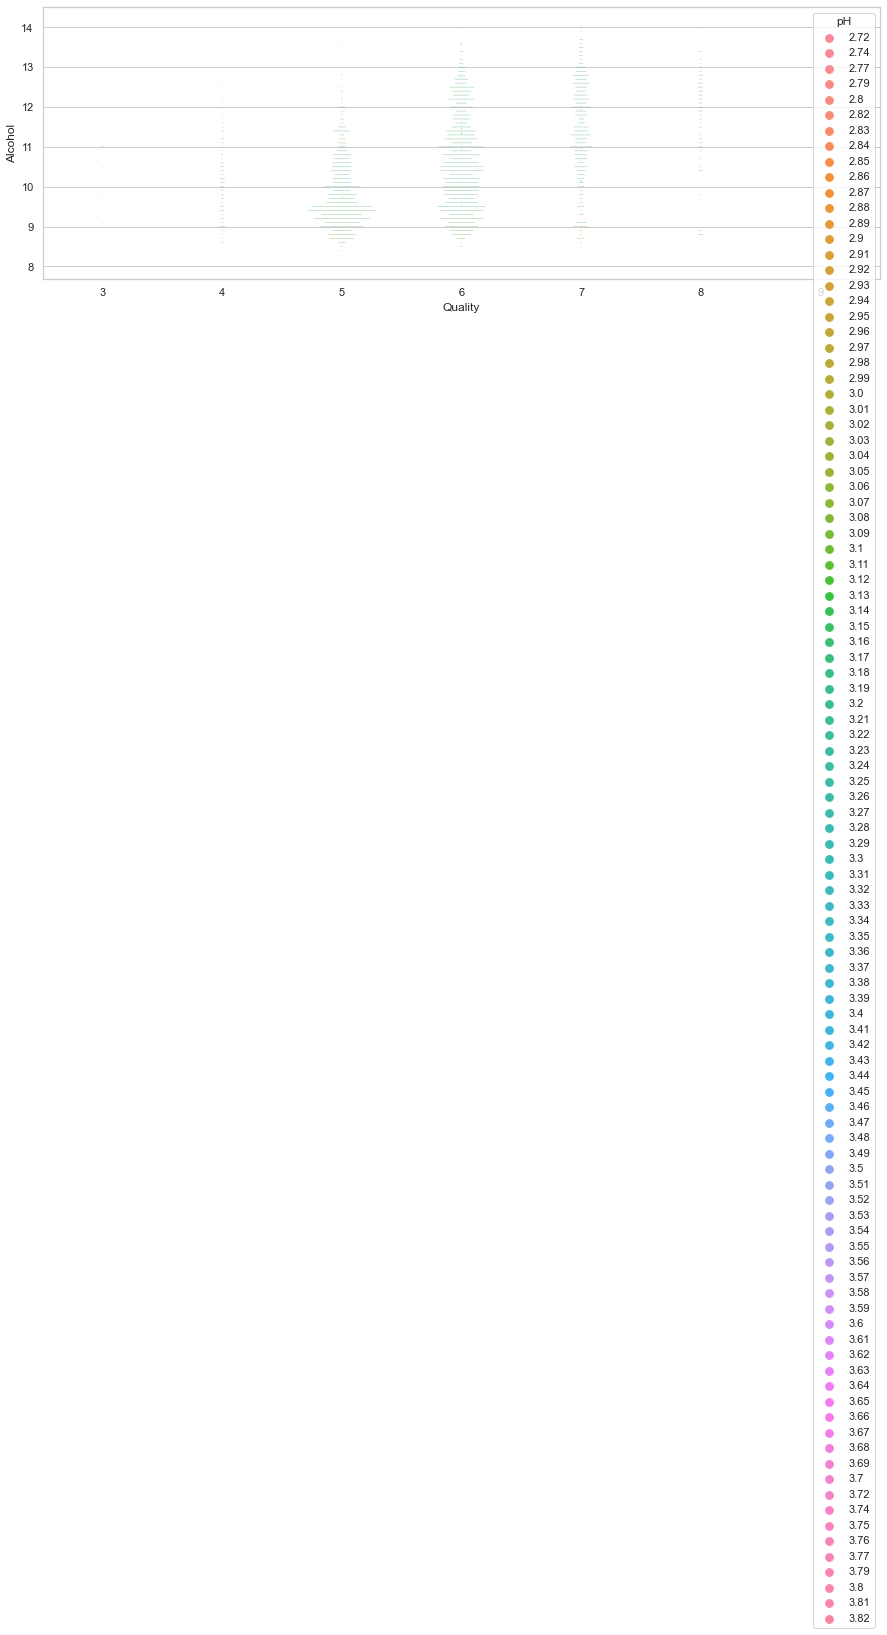

In [61]:
f, ax = plt.subplots(figsize=(15, 5))
sns.swarmplot(x="Quality",
             y="Alcohol",
             size=0.5,
             data=wine_data,
             hue="pH")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the marke

<AxesSubplot:xlabel='Alcohol', ylabel='Quality'>

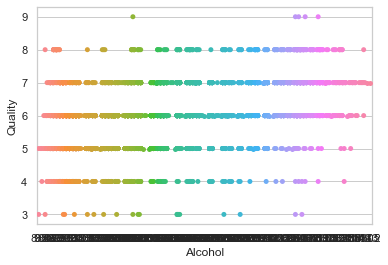

In [62]:
sns.swarmplot(y="Quality",
             x="Alcohol",
             data=wine_data,)

**Box Plot and Violin Plot**

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

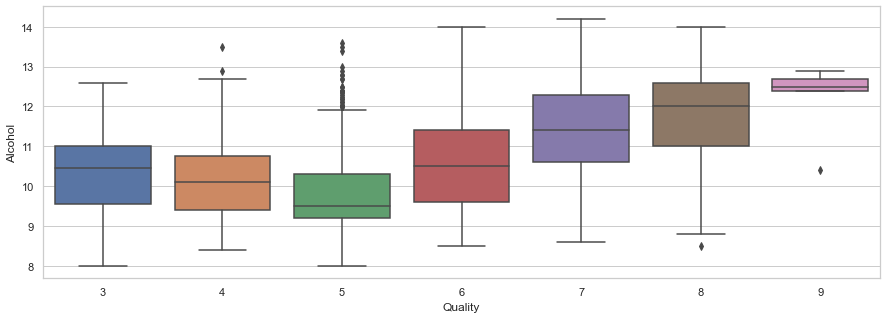

In [63]:
f, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x="Quality",
            y="Alcohol",
            data=wine_data)

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

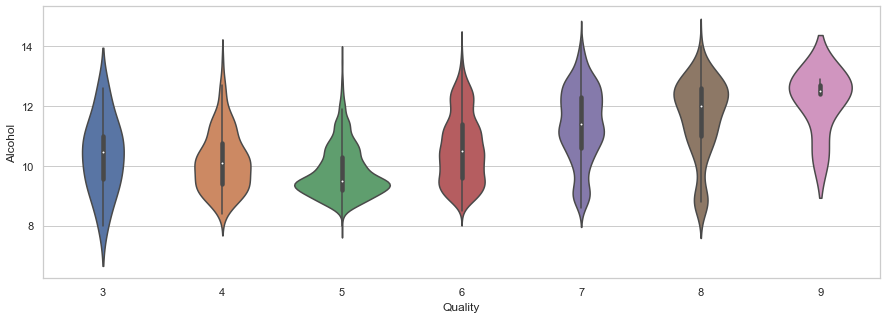

In [64]:
f, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(x="Quality",
            y="Alcohol",
            data=wine_data)

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

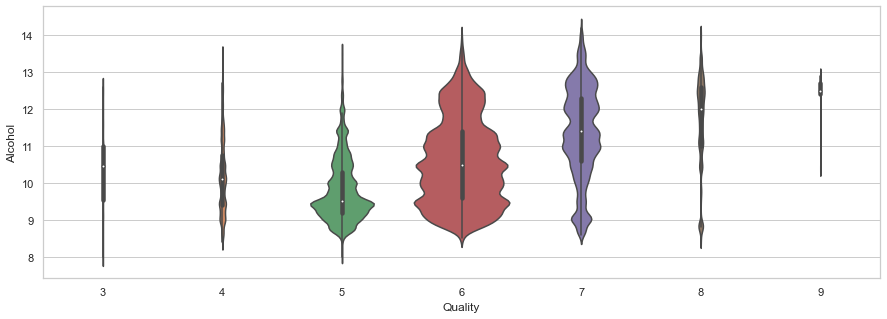

In [65]:
f, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(x="Quality",
            y="Alcohol",
            data=wine_data,
            scale="count",
            bw=0.1)

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

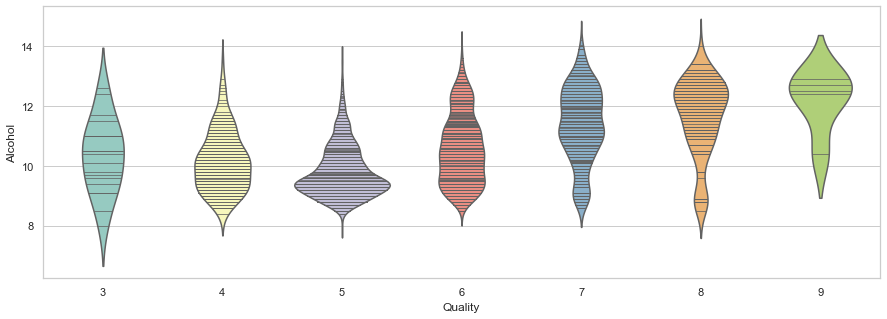

In [66]:
f, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(x="Quality",
            y="Alcohol",
            data=wine_data,
            inner="stick",
            palette="Set3")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

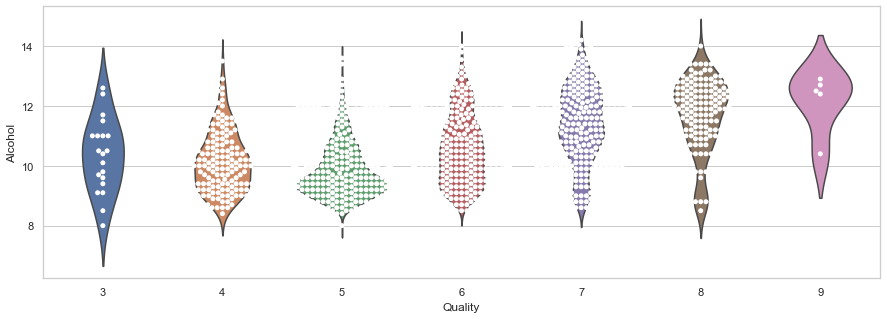

In [67]:
# Combining Multiple plots in same figure

f, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(x="Quality",
            y="Alcohol",
            data=wine_data,
            inner=None)

sns.swarmplot(x="Quality",
             y="Alcohol",
             data=wine_data,
             color="w")

**Bar Plot**

<AxesSubplot:xlabel='Quality', ylabel='pH'>

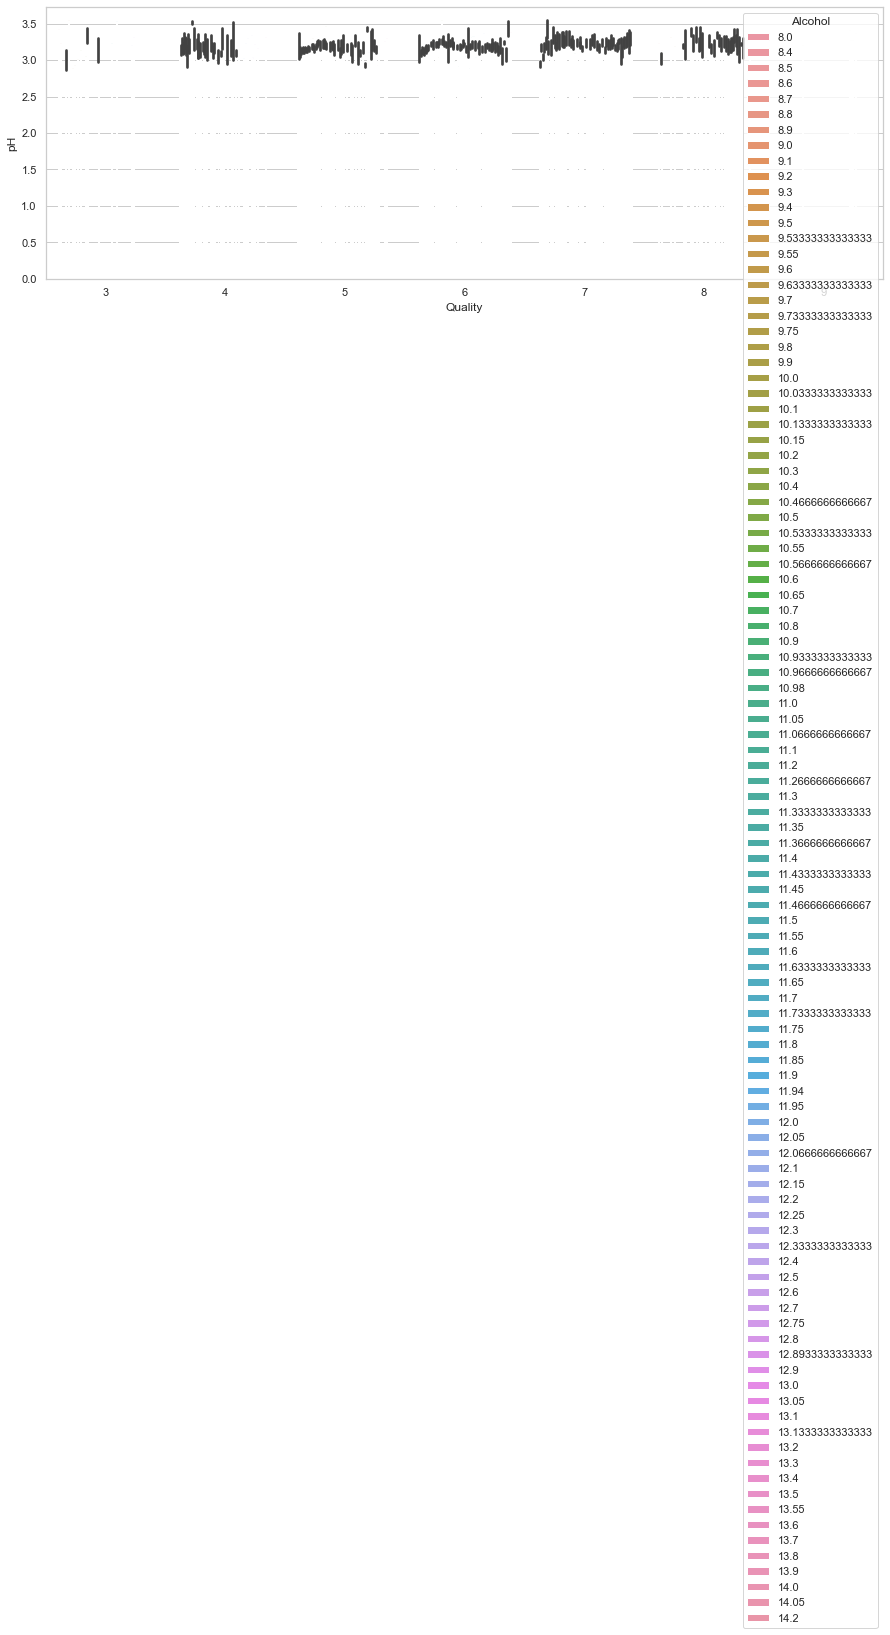

In [69]:
f, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x="Quality",
            y="pH",
            data=wine_data,
            hue="Alcohol")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 [Text(0, 0, '8.0'),
  Text(1, 0, '8.4'),
  Text(2, 0, '8.5'),
  Text(3, 0, '8.6'),
  Text(4, 0, '8.7'),
  Text(5, 0, '8.8'),
  Text(6, 0, '8.9'),
  Text(7, 0, '9.0'),
  Text(8, 0, '9.1'),
  Text(9, 0, '9.2'),
  Text(10, 0, '9.3'),
  Text(11, 0, '9.4'),
  Text(12, 0, '9.5'),
  Text(13, 0, '9.53333333333333'),
  Text(14, 0, '9.55'),
  Text(15, 0, '9.6'),
  Text(16, 0, '9.63333333333333'),
  Text(17, 0, '9.7'),
  Text

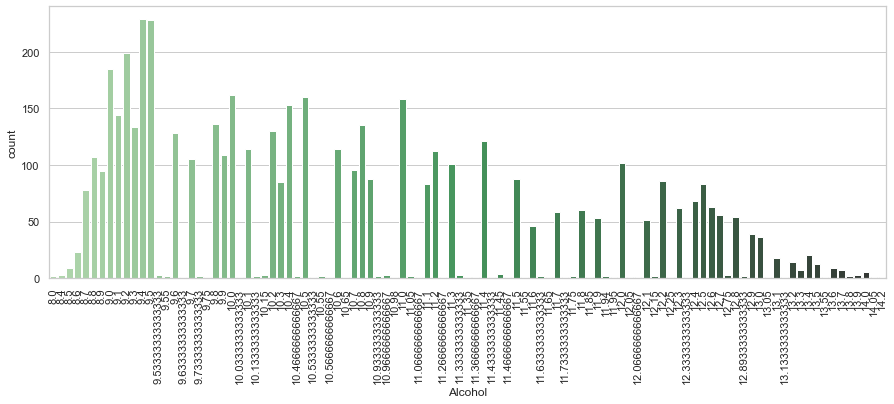

In [77]:
f, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x="Alcohol",
               data=wine_data, 
               palette="Greens_d")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Quality', ylabel='pH'>

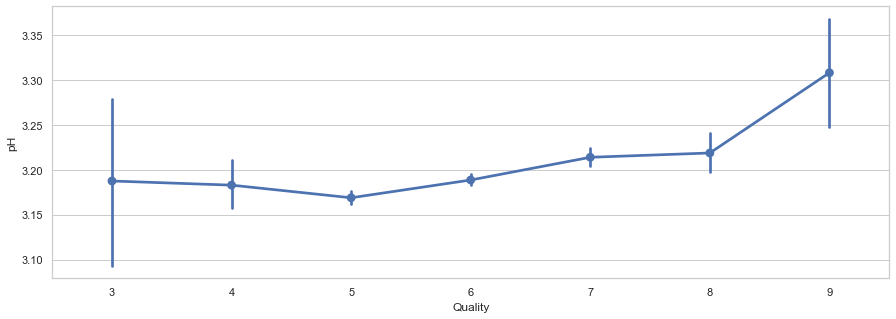

In [73]:
f, ax = plt.subplots(figsize=(15, 5))

sns.pointplot(x="Quality",
             y="pH",
             data=wine_data)

<AxesSubplot:xlabel='Quality', ylabel='pH'>

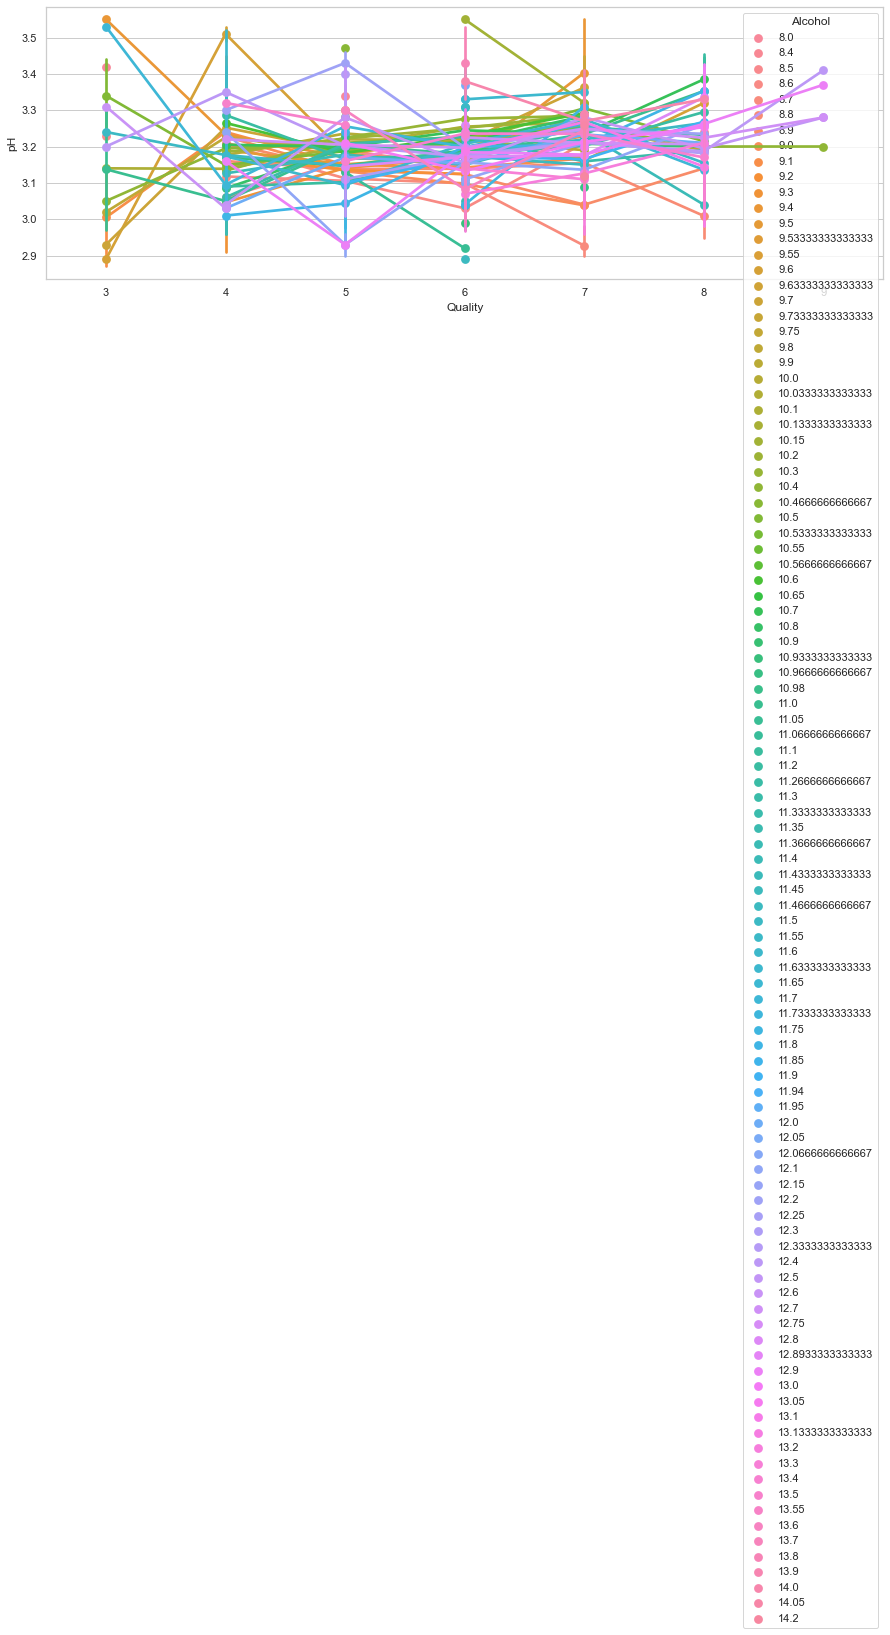

In [74]:
f, ax = plt.subplots(figsize=(15, 5))

sns.pointplot(x="Quality",
             y="pH",
             data=wine_data,
             hue="Alcohol")

<AxesSubplot:>

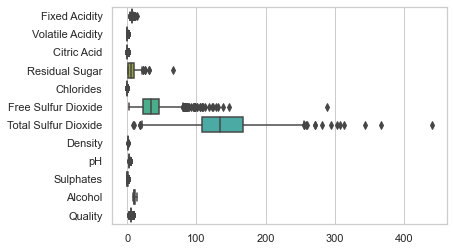

In [75]:
sns.boxplot(data=wine_data,
           orient="h")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


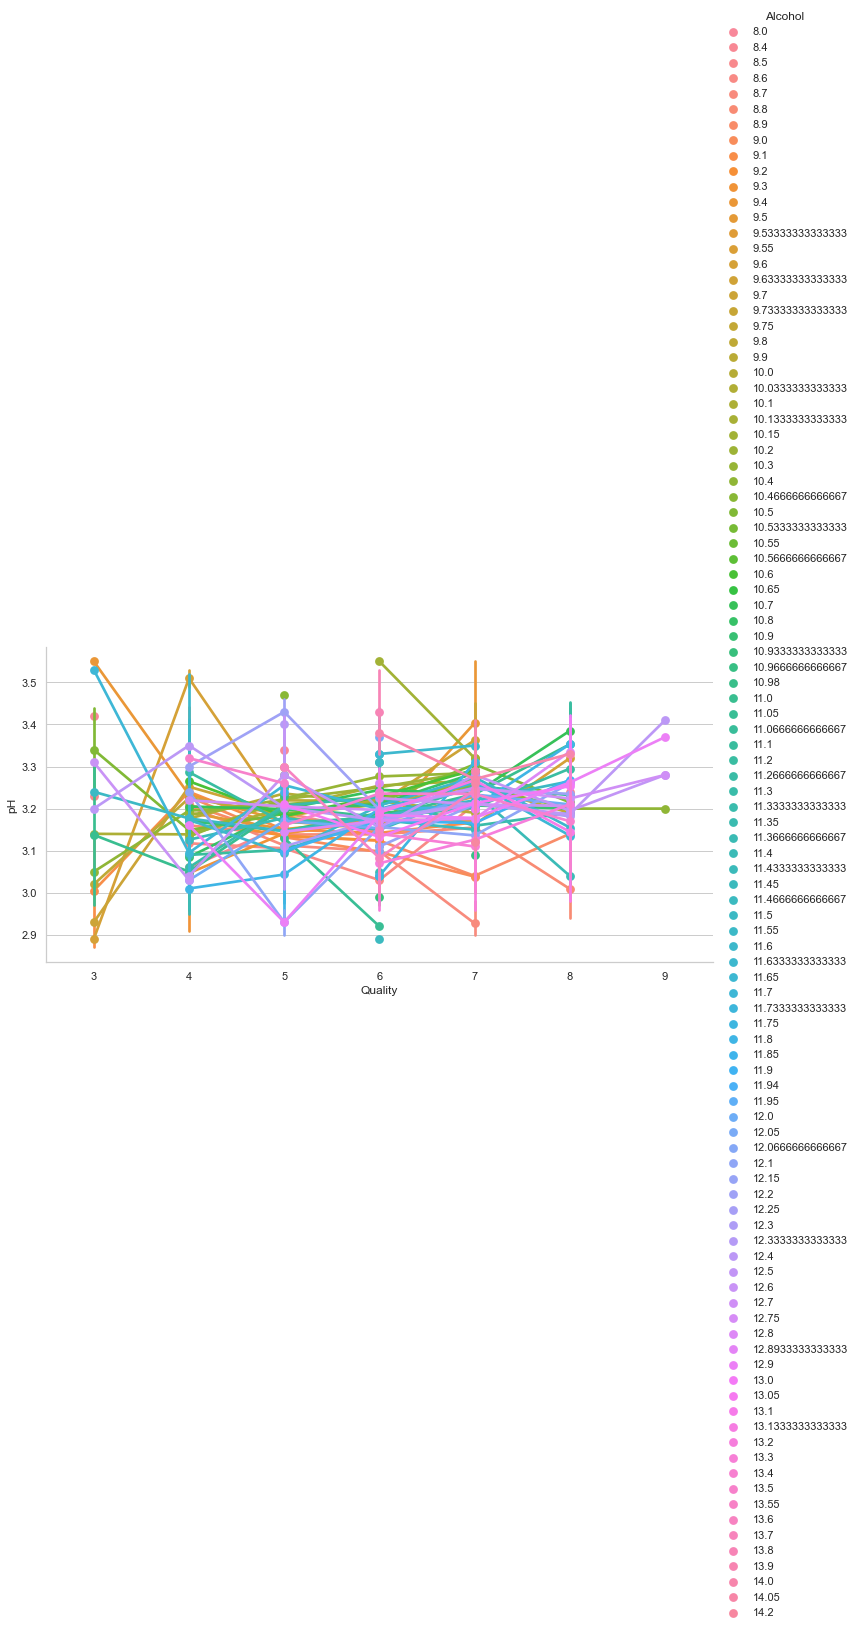

In [78]:
sns.factorplot(x="Quality", 
                y="pH",
               data=wine_data,
               hue="Alcohol",
               size=5, 
               aspect=2)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


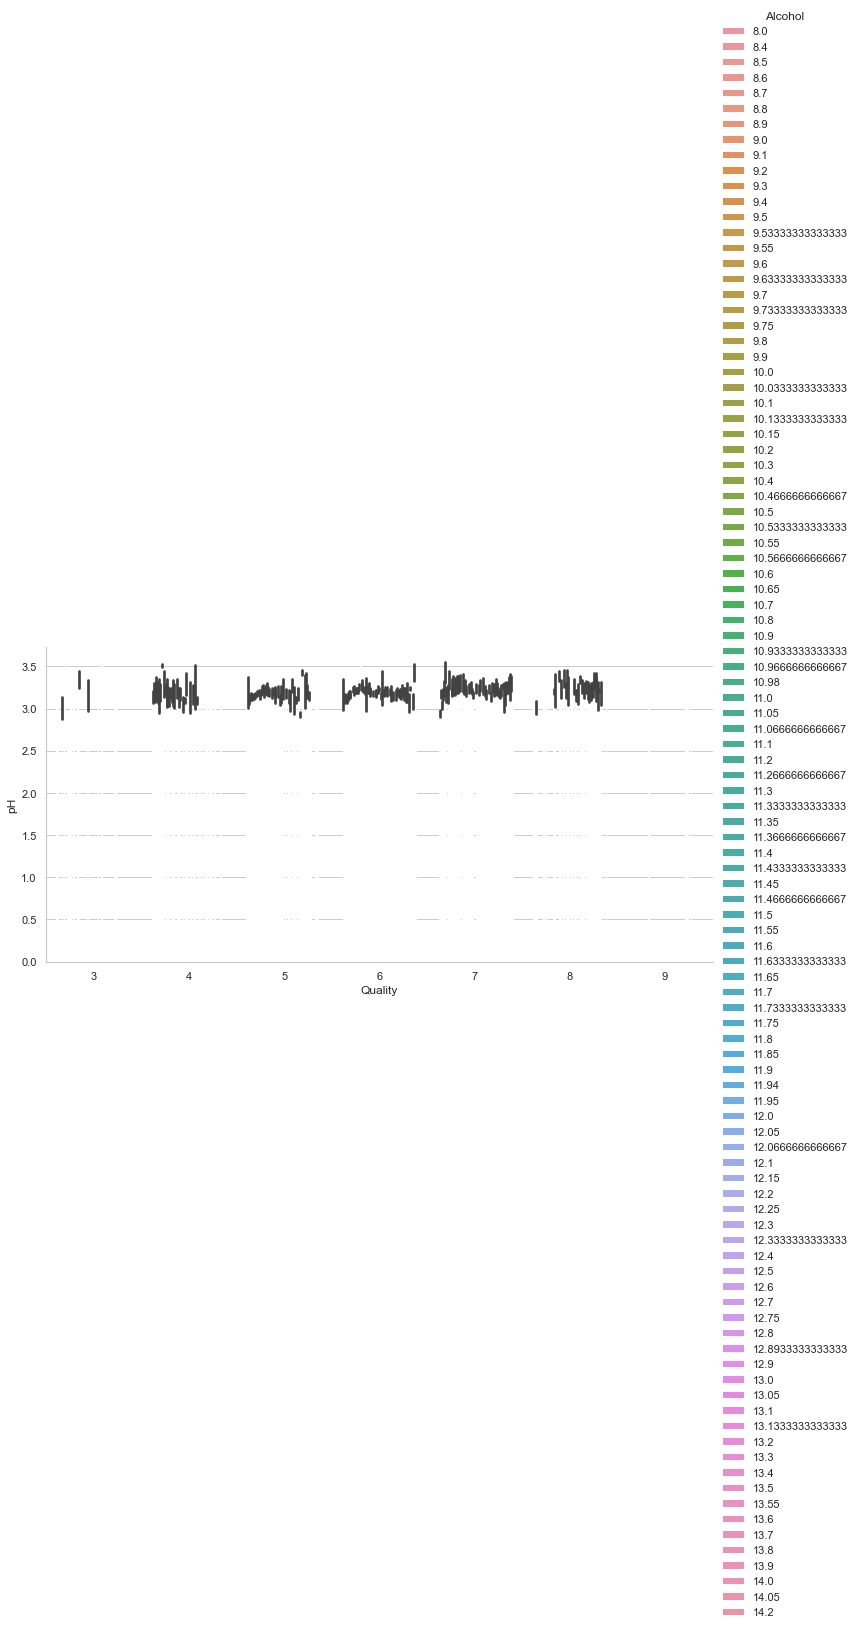

In [80]:
sns.factorplot(x="Quality", 
                y="pH",
               data=wine_data,
               hue="Alcohol",
               size=5, 
               aspect=2,
               kind="bar")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


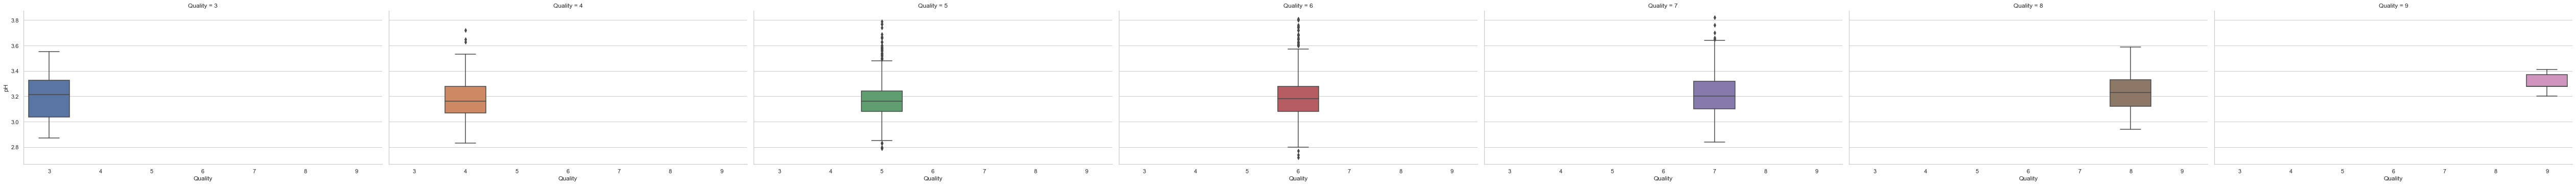

In [82]:
sns.factorplot(x="Quality", 
                y="pH",
               data=wine_data,
               size=5, 
               aspect=2,
               col="Quality",
               kind="box")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 4

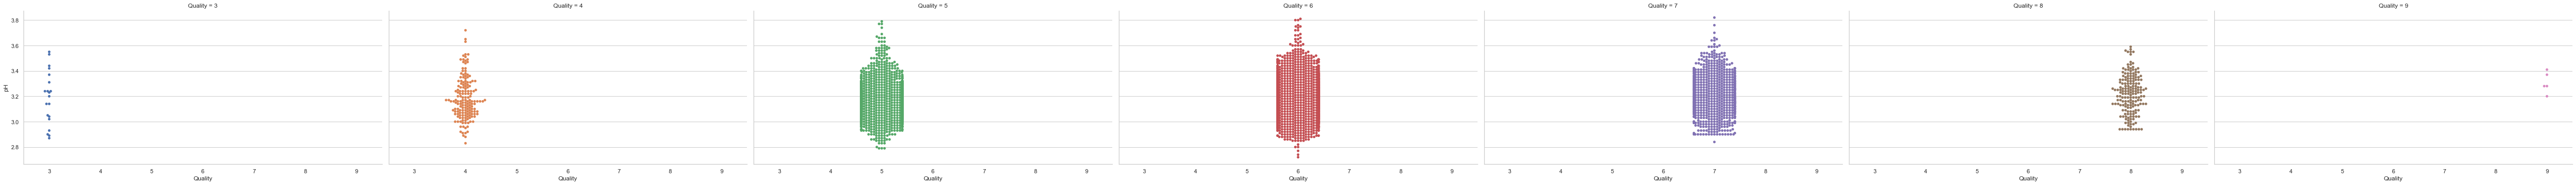

In [81]:
sns.factorplot(x="Quality", 
                y="pH",
               data=wine_data,
               size=5, 
               aspect=2,
               col="Quality",
               kind="swarm")